# Projet AXA

### Requirements

* numpy>=1.10.0  
* matplotlib>=1.5.0 
* pandas>=0.17.0  
* scikit-learn>=0.17 (different syntaxes for v0.17 and v0.18)   

In [1]:
%matplotlib inline
import os
import glob
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from datetime import datetime
import error_functions as ef

/Users/Antoine/anaconda2/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
blue_light = '#029aed'
orange_med = '#ff5722'
green_light = '#63a600'
gray_light = '#666666'

### Exploratory data analysis

In [58]:
data = pd.read_csv('data/train.csv', sep=";", nrows = 10e5)
print data.head()
print '\n Data Types:'
print data.dtypes

                      DATE  DAY_OFF  DAY_DS  WEEK_END DAY_WE_DS TPER_TEAM  \
0  2011-04-24 01:30:00.000        0     NaN         1  Dimanche      Nuit   
1  2011-04-24 01:30:00.000        0     NaN         1  Dimanche      Nuit   
2  2011-04-24 01:30:00.000        0     NaN         1  Dimanche      Nuit   
3  2011-04-24 01:30:00.000        0     NaN         1  Dimanche      Nuit   
4  2011-04-24 01:30:00.000        0     NaN         1  Dimanche      Nuit   

   TPER_HOUR  SPLIT_COD  ACD_COD        ACD_LIB      ...      CSPL_ACCEPTABLE  \
0          1        855        1  Entity1 G3RV6      ...                    0   
1          1       1587        1  Entity1 G3RV6      ...                    0   
2          1       1589        1  Entity1 G3RV6      ...                    0   
3          1       1591        1  Entity1 G3RV6      ...                    0   
4          1       1555        1  Entity1 G3RV6      ...                    1   

  CSPL_SERVICELEVEL CSPL_ACDAUXOUTCALLS CSPL_SLVLA

In [59]:
print(data.ASS_ASSIGNMENT.unique().shape[0])

28


In [60]:
data = pd.read_csv('data/train.csv', parse_dates=['DATE'], index_col = ['DATE'], sep=";", nrows = 10e5)
print data.head()
print data.dtypes

                     DAY_OFF  DAY_DS  WEEK_END DAY_WE_DS TPER_TEAM  TPER_HOUR  \
DATE                                                                            
2011-04-24 01:30:00        0     NaN         1  Dimanche      Nuit          1   
2011-04-24 01:30:00        0     NaN         1  Dimanche      Nuit          1   
2011-04-24 01:30:00        0     NaN         1  Dimanche      Nuit          1   
2011-04-24 01:30:00        0     NaN         1  Dimanche      Nuit          1   
2011-04-24 01:30:00        0     NaN         1  Dimanche      Nuit          1   

                     SPLIT_COD  ACD_COD        ACD_LIB    ASS_SOC_MERE  \
DATE                                                                     
2011-04-24 01:30:00        855        1  Entity1 G3RV6  Entity1 France   
2011-04-24 01:30:00       1587        1  Entity1 G3RV6  Entity1 France   
2011-04-24 01:30:00       1589        1  Entity1 G3RV6  Entity1 France   
2011-04-24 01:30:00       1591        1  Entity1 G3RV6  Entity

In [61]:
data.index

DatetimeIndex(['2011-04-24 01:30:00', '2011-04-24 01:30:00',
               '2011-04-24 01:30:00', '2011-04-24 01:30:00',
               '2011-04-24 01:30:00', '2011-04-25 01:30:00',
               '2011-04-25 01:30:00', '2011-04-25 01:30:00',
               '2011-04-25 01:30:00', '2011-04-25 01:30:00',
               ...
               '2011-07-29 18:00:00', '2011-07-29 18:00:00',
               '2011-07-29 18:00:00', '2011-07-29 18:00:00',
               '2011-07-29 18:00:00', '2011-07-29 18:00:00',
               '2011-07-29 18:00:00', '2011-07-29 18:00:00',
               '2011-07-29 18:00:00', '2011-07-29 18:00:00'],
              dtype='datetime64[ns]', name=u'DATE', length=1000000, freq=None)

In [33]:
submission = pd.read_csv('documentation/submission.txt', sep="\t")
print submission.head()
print '\n Data Types:'
print submission.dtypes

                      DATE                  ASS_ASSIGNMENT  prediction
0  2012-12-28 00:00:00.000                             CMS           0
1  2012-12-28 00:00:00.000                          Crises           0
2  2012-12-28 00:00:00.000                        Domicile           0
3  2012-12-28 00:00:00.000                         Gestion           0
4  2012-12-28 00:00:00.000  Gestion - Accueil Telephonique           0

 Data Types:
DATE              object
ASS_ASSIGNMENT    object
prediction         int64
dtype: object


In [34]:
print(submission.ASS_ASSIGNMENT.unique())

['CMS' 'Crises' 'Domicile' 'Gestion' 'Gestion - Accueil Telephonique'
 'Gestion Assurances' 'Gestion Relation Clienteles' 'Gestion Renault'
 'Japon' 'M\xc3\xa9dical' 'Nuit' 'RENAULT' 'Regulation Medicale' 'SAP'
 'Services' 'Tech. Axa' 'Tech. Inter' 'T\xc3\xa9l\xc3\xa9phonie'
 'Tech. Total' 'M\xc3\xa9canicien' 'CAT' 'Manager' 'Gestion Clients'
 'Gestion DZ' 'RTC' 'Prestataires']


In [36]:
print(data.ASS_ASSIGNMENT.unique())

['T\xc3\xa9l\xc3\xa9phonie' 'RTC' 'Gestion Renault' 'Nuit'
 'Gestion - Accueil Telephonique' 'Regulation Medicale' 'Services'
 'Tech. Total' 'Gestion Relation Clienteles' 'Crises' 'Japon'
 'M\xc3\xa9dical' 'Gestion Assurances' 'Domicile' 'Gestion' 'SAP' 'RENAULT'
 'Gestion Amex' 'Tech. Inter' 'Gestion Clients' 'Manager' 'Tech. Axa' 'CAT'
 'Gestion DZ' 'M\xc3\xa9canicien' 'CMS' 'Prestataires' 'Evenements']


In [227]:
# loading the data
data = pd.read_csv('data/train.csv', sep=";", parse_dates=['DATE'], index_col = ['DATE'], nrows = 10e6)
data['DATE'] = data.index
data.head()

/Users/Antoine/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


DAY_OFF  DAY_DS  WEEK_END DAY_WE_DS TPER_TEAM  TPER_HOUR  \
DATE                                                                            
2011-04-24 01:30:00        0     NaN         1  Dimanche      Nuit          1   
2011-04-24 01:30:00        0     NaN         1  Dimanche      Nuit          1   
2011-04-24 01:30:00        0     NaN         1  Dimanche      Nuit          1   
2011-04-24 01:30:00        0     NaN         1  Dimanche      Nuit          1   
2011-04-24 01:30:00        0     NaN         1  Dimanche      Nuit          1   

                     SPLIT_COD  ACD_COD        ACD_LIB    ASS_SOC_MERE  \
DATE                                                                     
2011-04-24 01:30:00        855        1  Entity1 G3RV6  Entity1 France   
2011-04-24 01:30:00       1587        1  Entity1 G3RV6  Entity1 France   
2011-04-24 01:30:00       1589        1  Entity1 G3RV6  Entity1 France   
2011-04-24 01:30:00       1591        1  Entity1 G3RV6  Entity1 France   
2011-04-24 01:30:00       1555        1  Entity1 G3RV6  Entity1 France   

                            ...         CSPL_SERVICELEVEL CSPL_ACDAUXOUTCALLS  \
DATE                        ...                                                 
2011-04-24 01:30:00         ...                        30                   0   
2011-04-24 01:30:00         ...                        15                   0   
2011-04-24 01:30:00         ...                        20                   0   
2011-04-24 01:30:00         ...                         0                   0   
2011-04-24 01:30:00         ...                        15                   0   

                    CSPL_SLVLABNS CSPL_SLVLOUTFLOWS CSPL_RECEIVED_CALLS  \
DATE                                                                      
2011-04-24 01:30:00             0                 0                   0   
2011-04-24 01:30:00             0                 0                   0   
2011-04-24 01:30:00             0                 0                   0   
2011-04-24 01:30:00             0                 0                   0   
2011-04-24 01:30:00             0                 0                   1   

                    CSPL_ABANDONNED_CALLS CSPL_CALLS  CSPL_ACWTIME  \
DATE                                                                 
2011-04-24 01:30:00                     0          0             0   
2011-04-24 01:30:00                     0          0             0   
2011-04-24 01:30:00                     0          0             0   
2011-04-24 01:30:00                     0          0             0   
2011-04-24 01:30:00                     0          1             0   

                     CSPL_ACDTIME                DATE  
DATE                                                   
2011-04-24 01:30:00             0 2011-04-24 01:30:00  
2011-04-24 01:30:00             0 2011-04-24 01:30:00  
2011-04-24 01:30:00             0 2011-04-24 01:30:00  
2011-04-24 01:30:00             0 2011-04-24 01:30:00  
2011-04-24 01:30:00           488 2011-04-24 01:30:00  

[5 rows x 86 columns]

In [228]:
# loading the data
submission = pd.read_csv('documentation/submission.txt', sep="\t", parse_dates=['DATE'], index_col = ['DATE'])
submission['DATE'] = submission.index
submission.head(20)

ASS_ASSIGNMENT  prediction  \
DATE                                                              
2012-12-28 00:00:00                             CMS           0   
2012-12-28 00:00:00                          Crises           0   
2012-12-28 00:00:00                        Domicile           0   
2012-12-28 00:00:00                         Gestion           0   
2012-12-28 00:00:00  Gestion - Accueil Telephonique           0   
2012-12-28 00:00:00              Gestion Assurances           0   
2012-12-28 00:00:00     Gestion Relation Clienteles           0   
2012-12-28 00:00:00                 Gestion Renault           0   
2012-12-28 00:00:00                           Japon           0   
2012-12-28 00:00:00                         Médical           0   
2012-12-28 00:00:00                            Nuit           0   
2012-12-28 00:00:00                         RENAULT           0   
2012-12-28 00:00:00             Regulation Medicale           0   
2012-12-28 00:00:00                             SAP           0   
2012-12-28 00:00:00                        Services           0   
2012-12-28 00:00:00                       Tech. Axa           0   
2012-12-28 00:00:00                     Tech. Inter           0   
2012-12-28 00:00:00                      Téléphonie           0   
2012-12-28 00:30:00                             CMS           0   
2012-12-28 00:30:00                          Crises           0   

                                   DATE  
DATE                                     
2012-12-28 00:00:00 2012-12-28 00:00:00  
2012-12-28 00:00:00 2012-12-28 00:00:00  
2012-12-28 00:00:00 2012-12-28 00:00:00  
2012-12-28 00:00:00 2012-12-28 00:00:00  
2012-12-28 00:00:00 2012-12-28 00:00:00  
2012-12-28 00:00:00 2012-12-28 00:00:00  
2012-12-28 00:00:00 2012-12-28 00:00:00  
2012-12-28 00:00:00 2012-12-28 00:00:00  
2012-12-28 00:00:00 2012-12-28 00:00:00  
2012-12-28 00:00:00 2012-12-28 00:00:00  
2012-12-28 00:00:00 2012-12-28 00:00:00  
2012-12-28 00:00:00 2012-12-28 00:00:00  
2012-12-28 00:00:00 2012-12-28 00:00:00  
2012-12-28 00:00:00 2012-12-28 00:00:00  
2012-12-28 00:00:00 2012-12-28 00:00:00  
2012-12-28 00:00:00 2012-12-28 00:00:00  
2012-12-28 00:00:00 2012-12-28 00:00:00  
2012-12-28 00:00:00 2012-12-28 00:00:00  
2012-12-28 00:30:00 2012-12-28 00:30:00  
2012-12-28 00:30:00 2012-12-28 00:30:00

In [229]:
# timestamp exctraction
def splitDatetime(data) :
    datatime = pd.DatetimeIndex(data.DATE)
    data['year'] = datatime.year
    data['month'] = datatime.month
    data['day'] = datatime.day
    data['hour'] = datatime.hour
    data['min'] = datatime.minute
    data['workingday'] = (datatime.weekday < 6).astype(int)
    return data

data = splitDatetime(data)
submission = splitDatetime(submission)

#data = data.drop_duplicates()
data.head()

DAY_OFF  DAY_DS  WEEK_END DAY_WE_DS TPER_TEAM  TPER_HOUR  \
DATE                                                                            
2011-04-24 01:30:00        0     NaN         1  Dimanche      Nuit          1   
2011-04-24 01:30:00        0     NaN         1  Dimanche      Nuit          1   
2011-04-24 01:30:00        0     NaN         1  Dimanche      Nuit          1   
2011-04-24 01:30:00        0     NaN         1  Dimanche      Nuit          1   
2011-04-24 01:30:00        0     NaN         1  Dimanche      Nuit          1   

                     SPLIT_COD  ACD_COD        ACD_LIB    ASS_SOC_MERE  \
DATE                                                                     
2011-04-24 01:30:00        855        1  Entity1 G3RV6  Entity1 France   
2011-04-24 01:30:00       1587        1  Entity1 G3RV6  Entity1 France   
2011-04-24 01:30:00       1589        1  Entity1 G3RV6  Entity1 France   
2011-04-24 01:30:00       1591        1  Entity1 G3RV6  Entity1 France   
2011-04-24 01:30:00       1555        1  Entity1 G3RV6  Entity1 France   

                        ...     CSPL_CALLS CSPL_ACWTIME CSPL_ACDTIME  \
DATE                    ...                                            
2011-04-24 01:30:00     ...              0            0            0   
2011-04-24 01:30:00     ...              0            0            0   
2011-04-24 01:30:00     ...              0            0            0   
2011-04-24 01:30:00     ...              0            0            0   
2011-04-24 01:30:00     ...              1            0          488   

                                   DATE  year month day  hour  min  workingday  
DATE                                                                            
2011-04-24 01:30:00 2011-04-24 01:30:00  2011     4  24     1   30           0  
2011-04-24 01:30:00 2011-04-24 01:30:00  2011     4  24     1   30           0  
2011-04-24 01:30:00 2011-04-24 01:30:00  2011     4  24     1   30           0  
2011-04-24 01:30:00 2011-04-24 01:30:00  2011     4  24     1   30           0  
2011-04-24 01:30:00 2011-04-24 01:30:00  2011     4  24     1   30           0  

[5 rows x 92 columns]

In [230]:
X_test = pd.DataFrame(index = submission.index)
X_test['DATE'] = submission.index
X_test = splitDatetime(X_test)
X_test.drop('DATE', axis=1, inplace=True)
X_test = X_test.drop_duplicates()
X_test.head()

year  month  day  hour  min  workingday
DATE                                                        
2012-12-28 00:00:00  2012     12   28     0    0           1
2012-12-28 00:30:00  2012     12   28     0   30           1
2012-12-28 01:00:00  2012     12   28     1    0           1
2012-12-28 01:30:00  2012     12   28     1   30           1
2012-12-28 02:00:00  2012     12   28     2    0           1

In [231]:
X_test.index

DatetimeIndex(['2012-12-28 00:00:00', '2012-12-28 00:30:00',
               '2012-12-28 01:00:00', '2012-12-28 01:30:00',
               '2012-12-28 02:00:00', '2012-12-28 02:30:00',
               '2012-12-28 03:00:00', '2012-12-28 03:30:00',
               '2012-12-28 04:00:00', '2012-12-28 04:30:00',
               ...
               '2013-12-28 19:00:00', '2013-12-28 19:30:00',
               '2013-12-28 20:00:00', '2013-12-28 20:30:00',
               '2013-12-28 21:00:00', '2013-12-28 21:30:00',
               '2013-12-28 22:00:00', '2013-12-28 22:30:00',
               '2013-12-28 23:00:00', '2013-12-28 23:30:00'],
              dtype='datetime64[ns]', name=u'DATE', length=4028, freq=None)

In [232]:
tt1 = pd.Timestamp('2012-12-28 00:00:00')
print(tt1)
print(X_test.ix['2012-12-28 00:00:00'])

2012-12-28 00:00:00
year          2012
month           12
day             28
hour             0
min              0
workingday       1
Name: 2012-12-28 00:00:00, dtype: int64


In [233]:
data.index

DatetimeIndex(['2011-04-24 01:30:00', '2011-04-24 01:30:00',
               '2011-04-24 01:30:00', '2011-04-24 01:30:00',
               '2011-04-24 01:30:00', '2011-04-25 01:30:00',
               '2011-04-25 01:30:00', '2011-04-25 01:30:00',
               '2011-04-25 01:30:00', '2011-04-25 01:30:00',
               ...
               '2013-09-04 14:00:00', '2013-09-04 14:00:00',
               '2013-09-04 14:00:00', '2013-09-04 14:00:00',
               '2013-09-04 14:00:00', '2013-09-04 14:00:00',
               '2013-09-04 14:00:00', '2013-09-04 14:00:00',
               '2013-09-04 14:00:00', '2013-09-04 14:00:00'],
              dtype='datetime64[ns]', name=u'DATE', length=10000000, freq=None)

In [234]:
X = data[['year','month','day','hour','ASS_ASSIGNMENT','CSPL_CALLS','min','DATE']]
#X=pd.DataFrame(data.groupby(['year','month','day','hour','ASS_ASSIGNMENT','min']).CSPL_CALLS.sum())

#X.drop_duplicates(subset=['year','month','day','hour','ASS_ASSIGNMENT','CSPL_CALLS','min'], keep=False)
print(X[10000:10020])

                     year  month  day  hour       ASS_ASSIGNMENT  CSPL_CALLS  \
DATE                                                                           
2011-01-29 00:30:00  2011      1   29     0              Médical           0   
2011-01-29 00:30:00  2011      1   29     0            Tech. Axa           0   
2011-01-29 00:30:00  2011      1   29     0   Gestion Assurances           0   
2011-01-29 00:30:00  2011      1   29     0                Japon           0   
2011-01-29 00:30:00  2011      1   29     0             Domicile           0   
2011-01-29 00:30:00  2011      1   29     0         Prestataires           0   
2011-01-29 00:30:00  2011      1   29     0            Tech. Axa           0   
2011-01-29 00:30:00  2011      1   29     0  Regulation Medicale           0   
2011-01-29 00:30:00  2011      1   29     0          Tech. Total           0   
2011-01-29 00:30:00  2011      1   29     0              Gestion           0   
2011-01-29 00:30:00  2011      1   29   

In [235]:
df1 = X.pivot_table(index = ['DATE'], columns = ['ASS_ASSIGNMENT'], values = ['CSPL_CALLS'], aggfunc=np.sum)
print(df1.shape)
df1.fillna(0, inplace=True)
df1.head()

(46653, 28)


CSPL_CALLS                                          \
ASS_ASSIGNMENT             CAT  CMS Crises Domicile Evenements Gestion   
DATE                                                                     
2011-01-01 00:00:00        0.0  0.0    0.0      0.0        0.0     0.0   
2011-01-01 00:30:00        0.0  0.0    0.0      0.0        0.0     0.0   
2011-01-01 01:00:00        0.0  0.0    0.0      0.0        0.0     0.0   
2011-01-01 01:30:00        0.0  0.0    0.0      0.0        0.0     0.0   
2011-01-01 02:00:00        0.0  0.0    0.0      0.0        0.0     0.0   

                                                                 \
ASS_ASSIGNMENT      Gestion - Accueil Telephonique Gestion Amex   
DATE                                                              
2011-01-01 00:00:00                            0.0          0.0   
2011-01-01 00:30:00                            0.0          0.0   
2011-01-01 01:00:00                            0.0          0.0   
2011-01-01 01:30:00                            0.0          0.0   
2011-01-01 02:00:00                            0.0          0.0   

                                                          ...      \
ASS_ASSIGNMENT      Gestion Assurances Gestion Clients    ...       
DATE                                                      ...       
2011-01-01 00:00:00                0.0             0.0    ...       
2011-01-01 00:30:00                0.0             0.0    ...       
2011-01-01 01:00:00                0.0             0.0    ...       
2011-01-01 01:30:00                0.0             0.0    ...       
2011-01-01 02:00:00                0.0             0.0    ...       

                                                                        \
ASS_ASSIGNMENT      Prestataires RENAULT  RTC Regulation Medicale  SAP   
DATE                                                                     
2011-01-01 00:00:00          0.0     0.0  0.0                 0.0  0.0   
2011-01-01 00:30:00          0.0     0.0  0.0                 0.0  0.0   
2011-01-01 01:00:00          0.0     0.0  0.0                 0.0  0.0   
2011-01-01 01:30:00          0.0     0.0  0.0                 0.0  0.0   
2011-01-01 02:00:00          0.0     0.0  0.0                 0.0  0.0   

                                                                           
ASS_ASSIGNMENT      Services Tech. Axa Tech. Inter Tech. Total Téléphonie  
DATE                                                                       
2011-01-01 00:00:00      0.0       0.0         0.0         0.0        0.0  
2011-01-01 00:30:00      3.0       0.0         0.0         0.0        1.0  
2011-01-01 01:00:00      0.0       0.0         0.0         0.0        0.0  
2011-01-01 01:30:00      0.0       0.0         0.0         0.0        0.0  
2011-01-01 02:00:00      2.0       0.0         0.0         0.0        0.0  

[5 rows x 28 columns]

In [236]:
df1.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 00:30:00',
               '2011-01-01 01:00:00', '2011-01-01 01:30:00',
               '2011-01-01 02:00:00', '2011-01-01 02:30:00',
               '2011-01-01 03:00:00', '2011-01-01 03:30:00',
               '2011-01-01 04:00:00', '2011-01-01 04:30:00',
               ...
               '2013-12-31 09:30:00', '2013-12-31 10:00:00',
               '2013-12-31 10:30:00', '2013-12-31 11:00:00',
               '2013-12-31 11:30:00', '2013-12-31 12:00:00',
               '2013-12-31 12:30:00', '2013-12-31 13:00:00',
               '2013-12-31 13:30:00', '2013-12-31 14:30:00'],
              dtype='datetime64[ns]', name=u'DATE', length=46653, freq=None)

In [237]:
print df1.dtypes

            ASS_ASSIGNMENT                
CSPL_CALLS  CAT                               float64
            CMS                               float64
            Crises                            float64
            Domicile                          float64
            Evenements                        float64
            Gestion                           float64
            Gestion - Accueil Telephonique    float64
            Gestion Amex                      float64
            Gestion Assurances                float64
            Gestion Clients                   float64
            Gestion DZ                        float64
            Gestion Relation Clienteles       float64
            Gestion Renault                   float64
            Japon                             float64
            Manager                           float64
            Mécanicien                        float64
            Médical                           float64
            Nuit                       

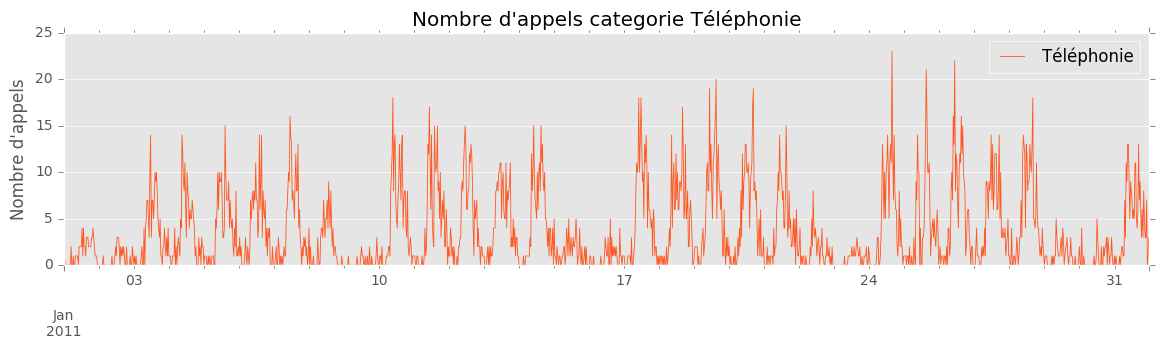

TypeError: not all arguments converted during string formatting

In [11]:
for cat in data.ASS_ASSIGNMENT.unique() :
    fig = plt.figure(figsize=[14,3])
    plt.style.use('ggplot')
    period = '2011-01'
    plot_cat = df1['CSPL_CALLS'][cat][period].plot(color=orange_med,linewidth=.6)
    #plot_registered = X['CSPL_ACDCALLS'][periode].plot(color=blue_light,linewidth=.6)
    #plot_casual = X['CSPL_ABNCALLS'][periode].plot(color=green_light,linewidth=.6)
    plt.ylabel('Nombre d\'appels')
    plt.legend([cat.decode('utf-8')],loc='best')
    plt.title('Nombre d\'appels categorie %s' %cat.decode('utf-8'))
    plt.xlabel('')
    plt.show()
    fig.savefig('plots/appels_categorie_%s_period.png' %(cat.decode('utf-8'),period),bbox_inches='tight')

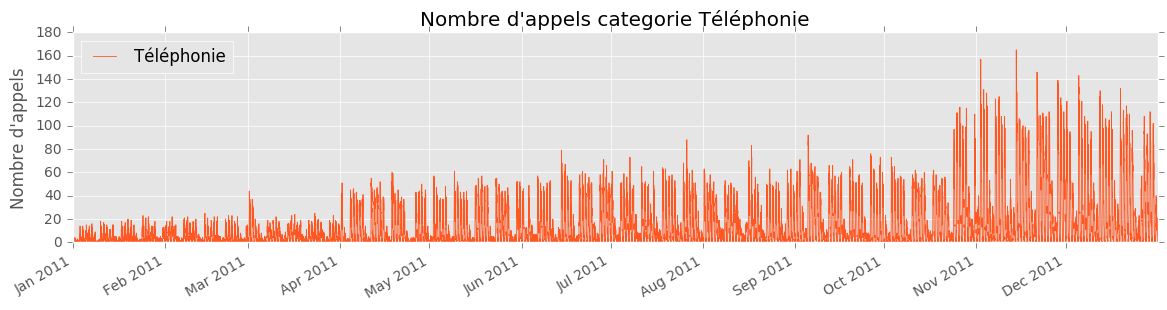

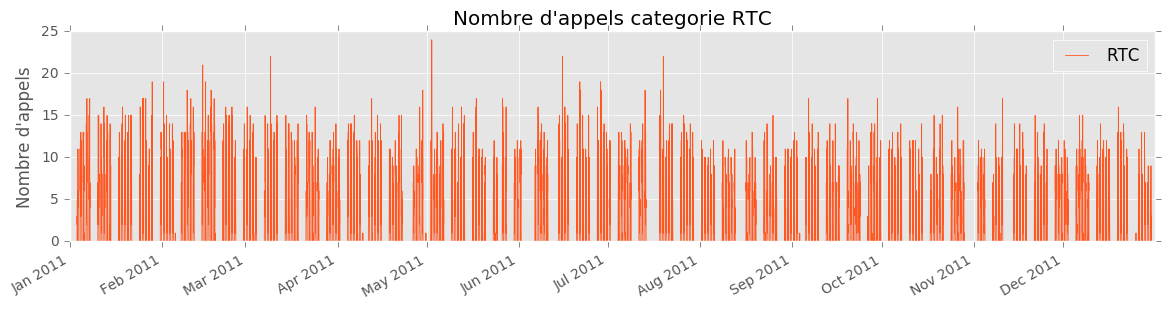

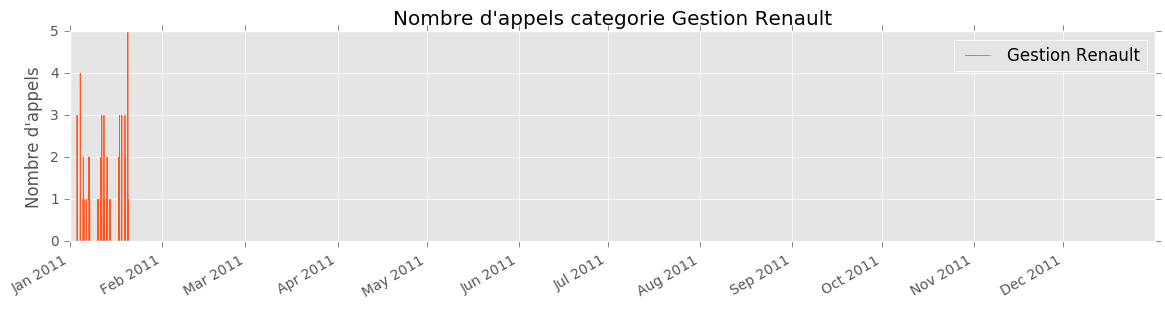

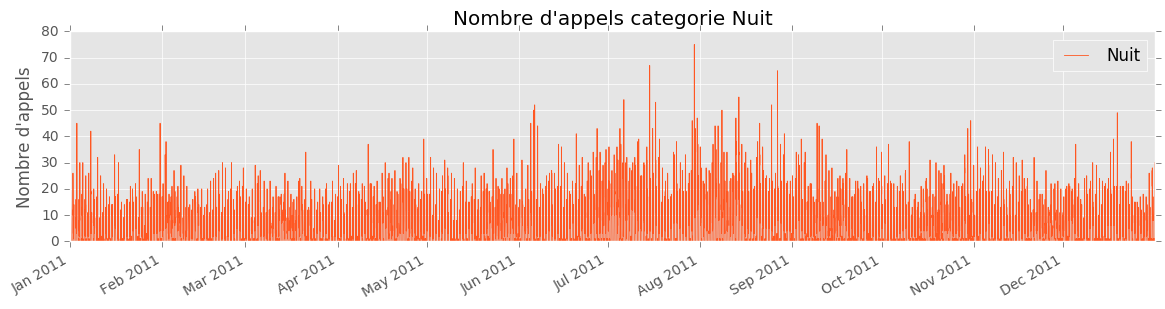

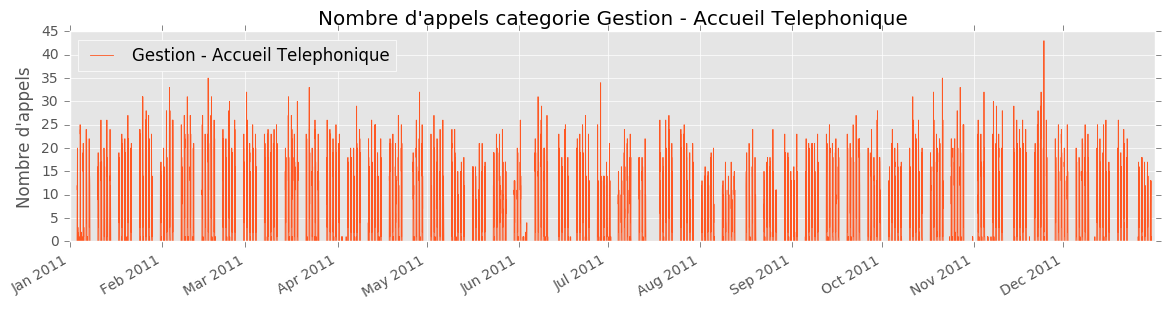

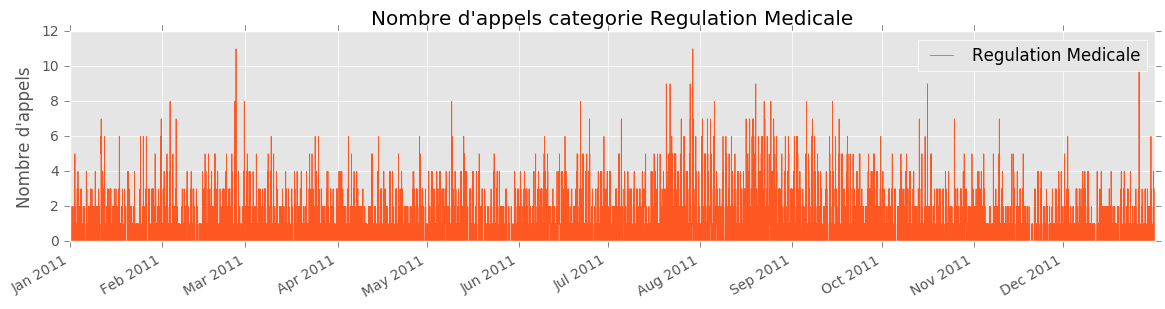

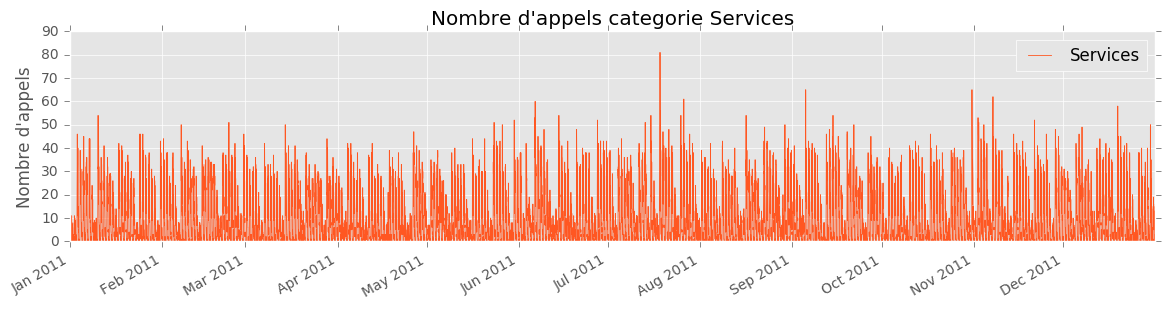

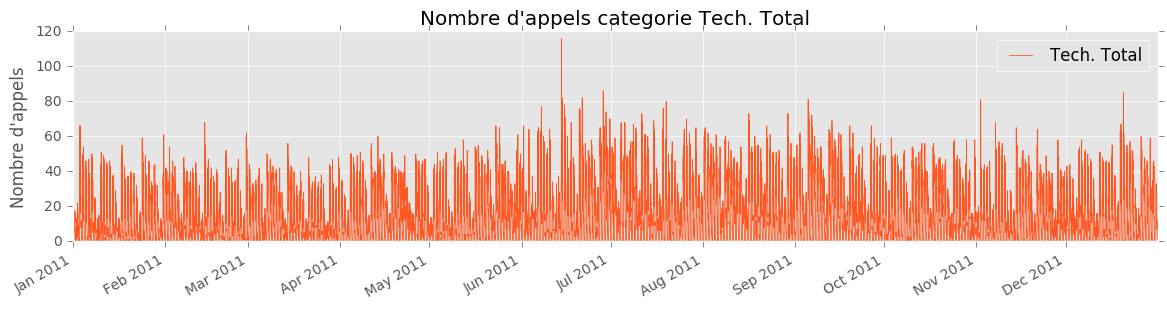

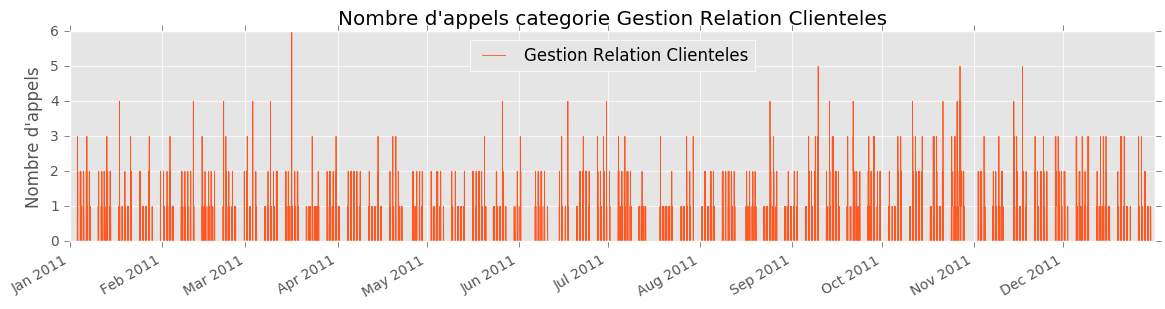

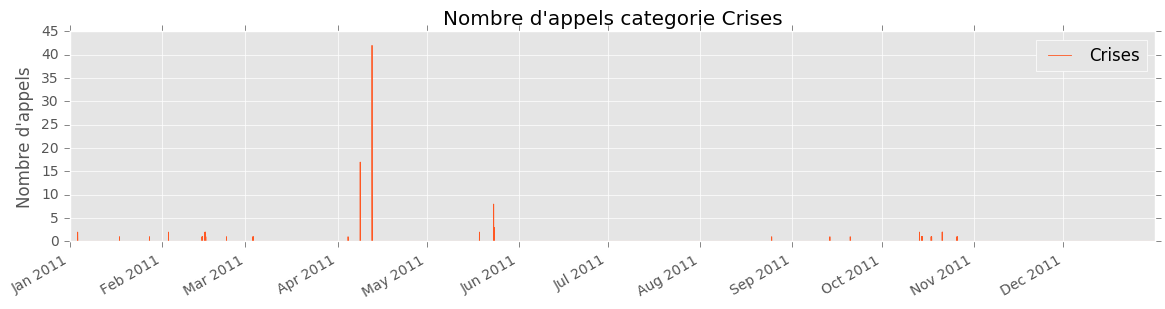

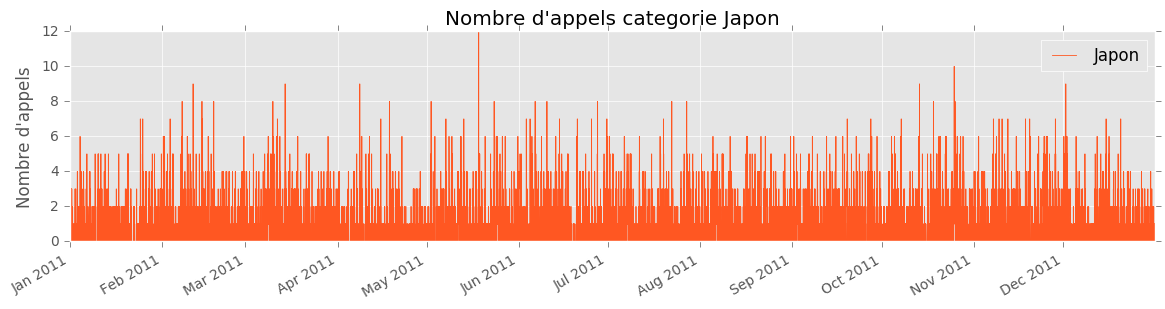

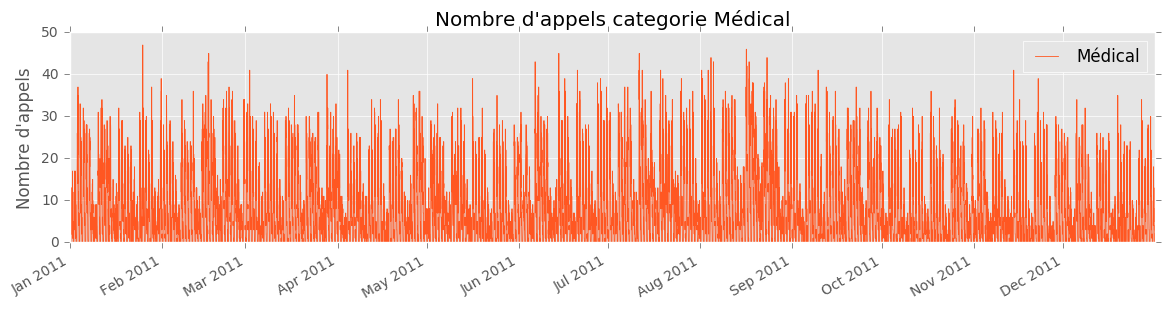

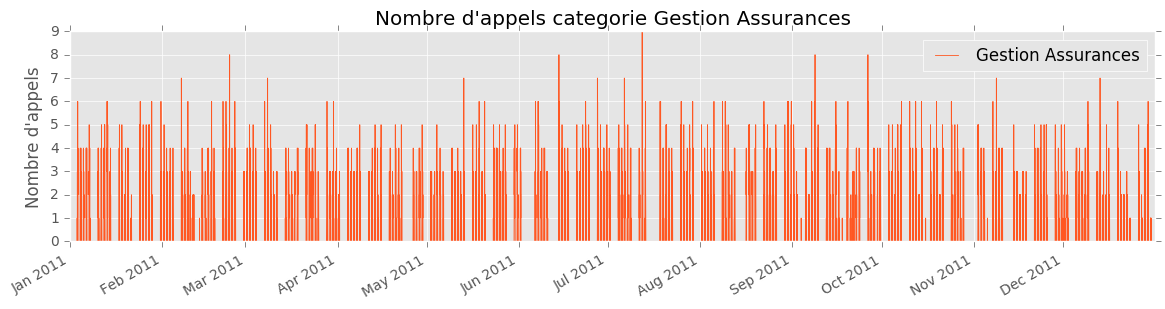

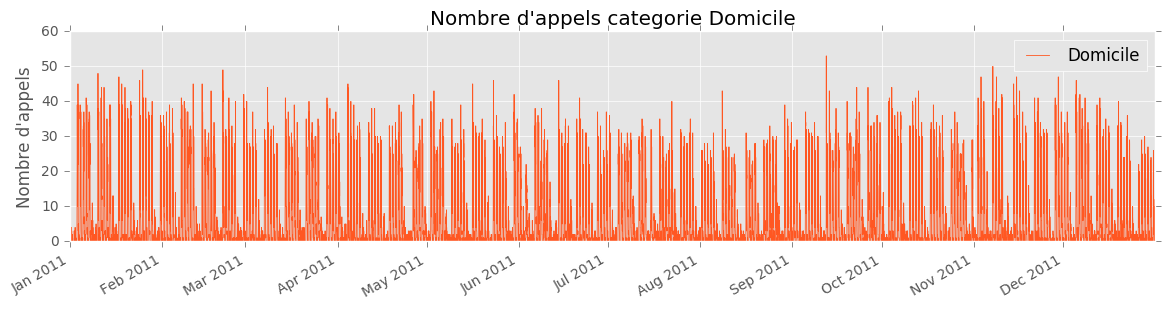

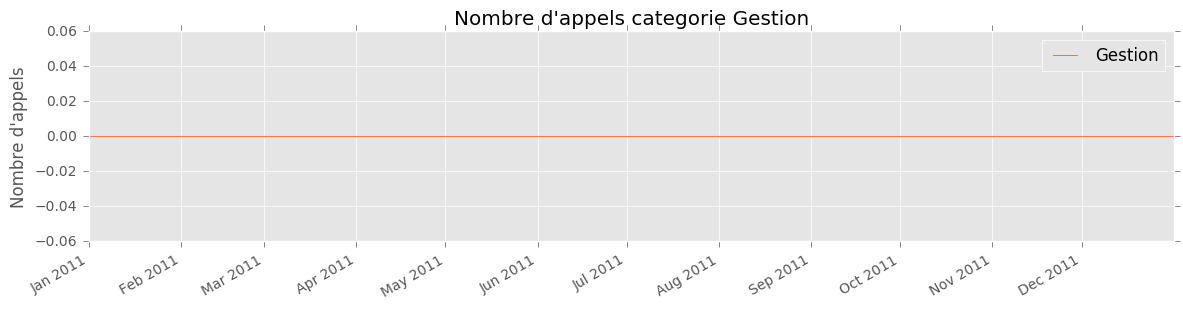

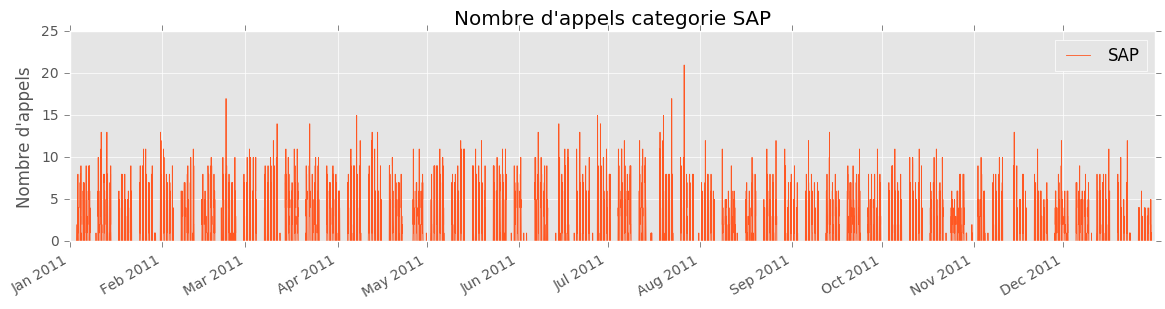

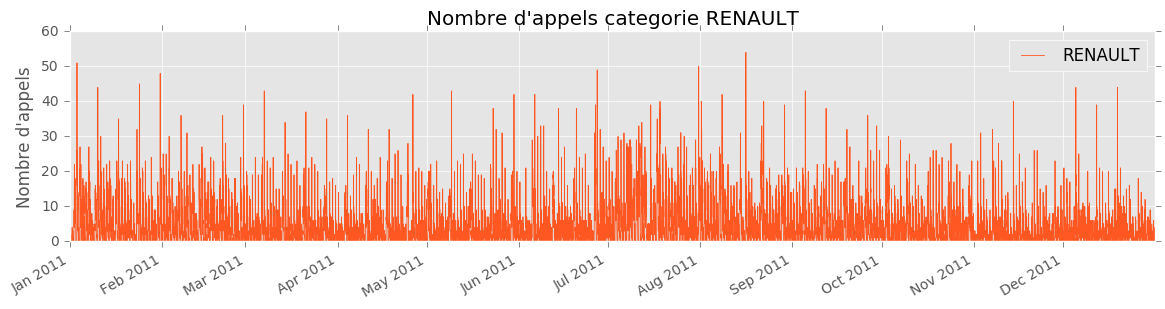

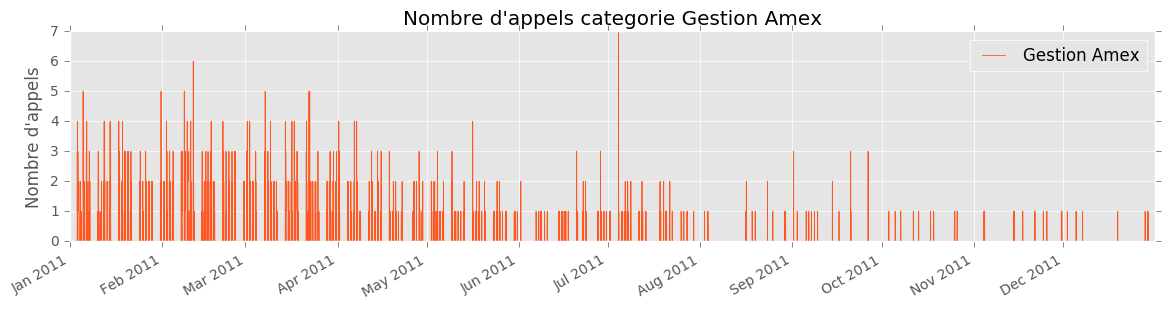

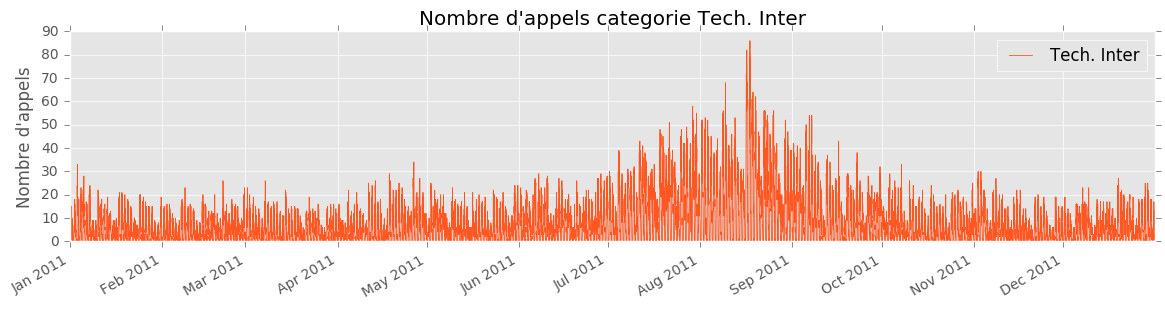

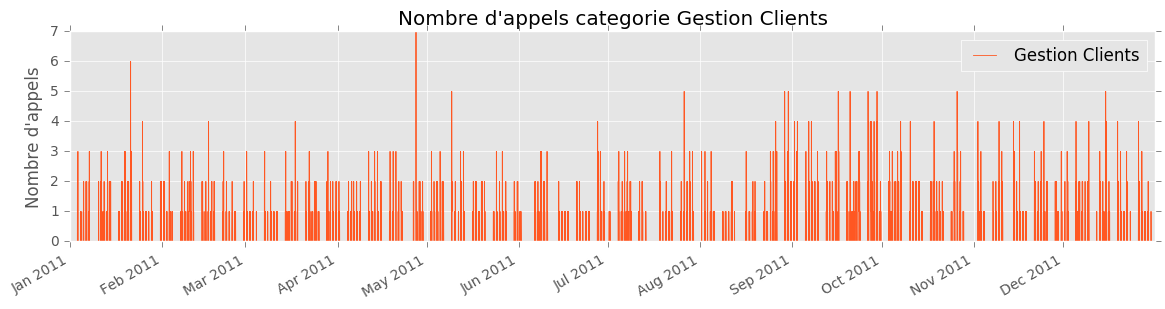

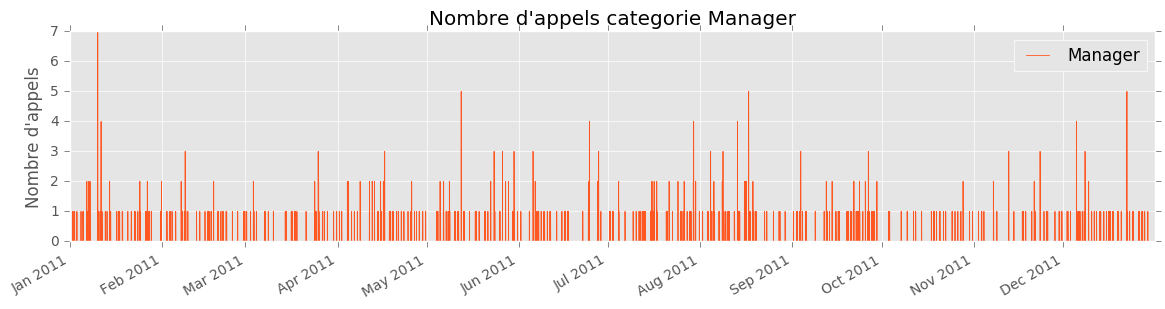

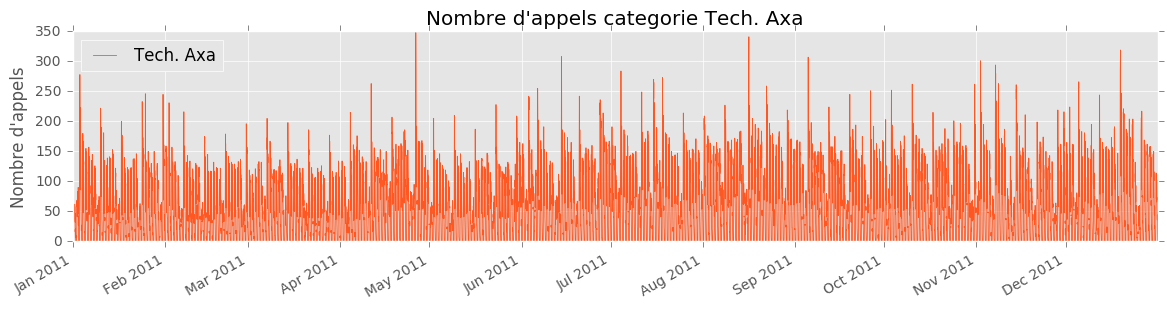

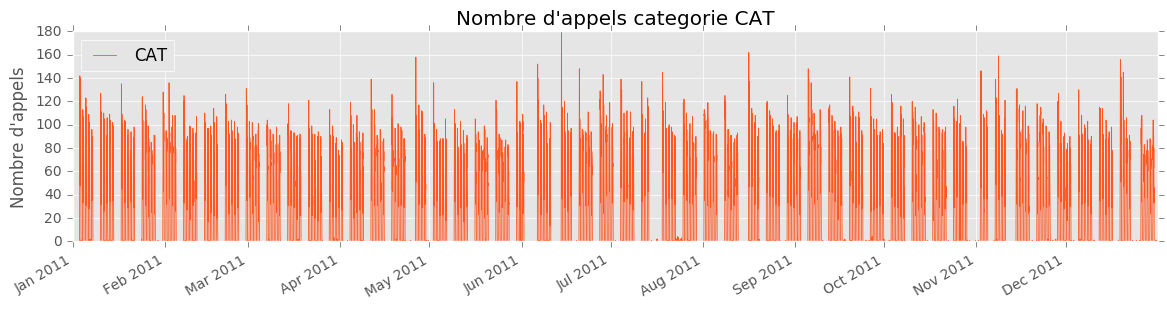

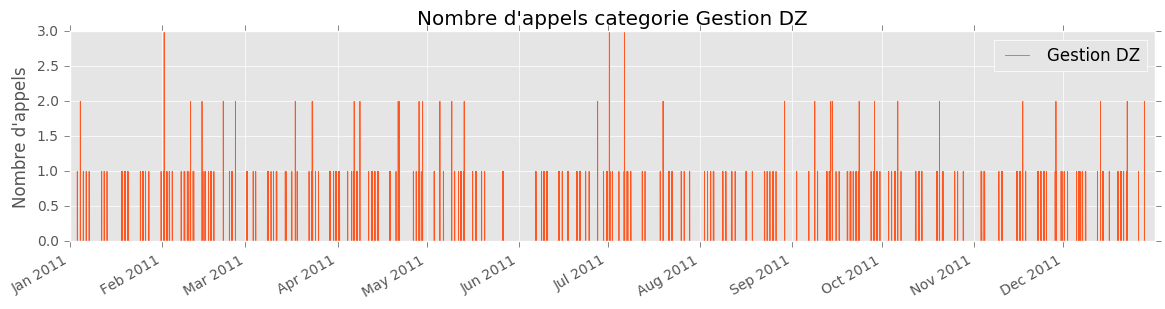

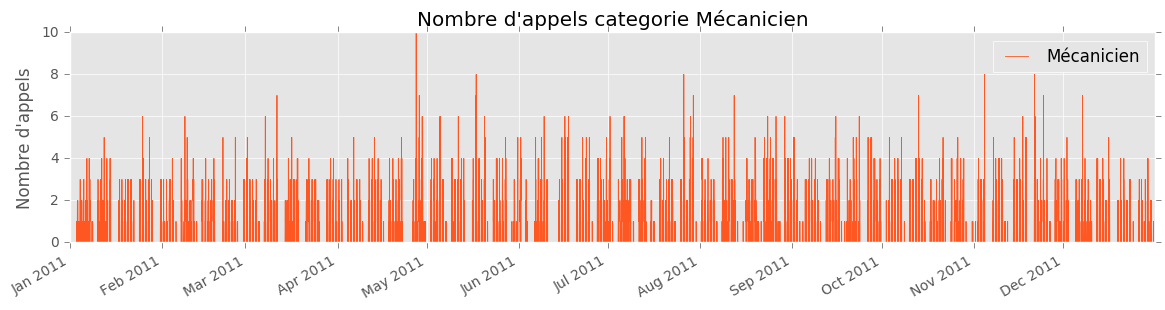

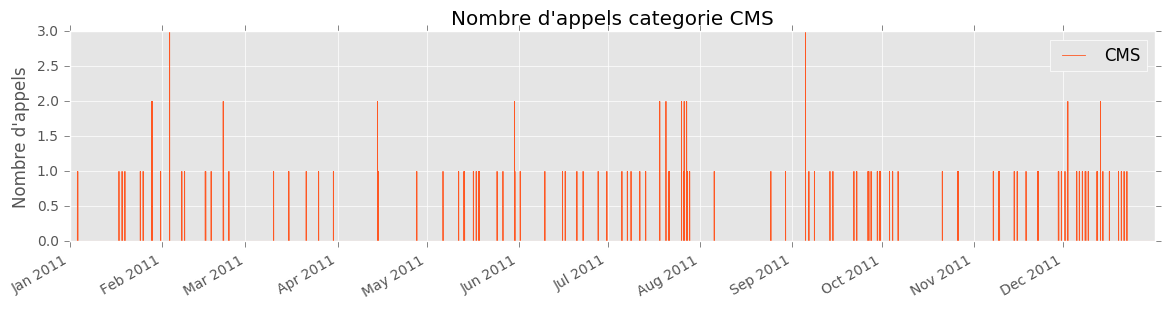

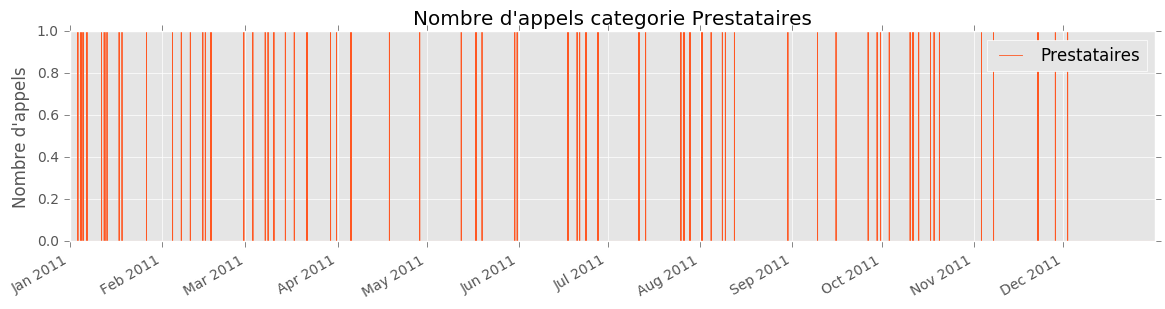

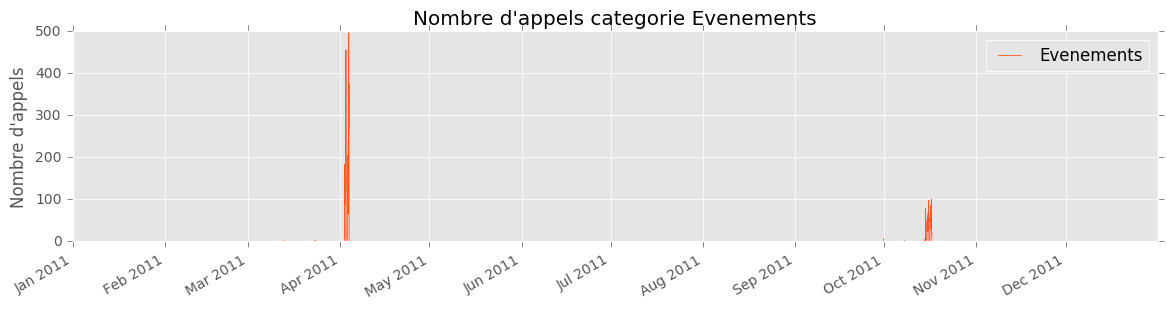

In [87]:
for cat in data.ASS_ASSIGNMENT.unique() :
    fig = plt.figure(figsize=[14,3])
    plt.style.use('ggplot')
    period = '2011'
    plot_cat = df1['CSPL_CALLS'][cat][period].plot(color=orange_med,linewidth=.6)
    #plot_registered = X['CSPL_ACDCALLS'][periode].plot(color=blue_light,linewidth=.6)
    #plot_casual = X['CSPL_ABNCALLS'][periode].plot(color=green_light,linewidth=.6)
    plt.ylabel('Nombre d\'appels')
    plt.legend([cat.decode('utf-8')],loc='best')
    plt.title('Nombre d\'appels categorie %s' %cat.decode('utf-8'))
    plt.xlabel('')
    plt.show()
    #fig.savefig('plots/appels_categorie_%s_period.png' %(cat.decode('utf-8'),period),bbox_inches='tight')

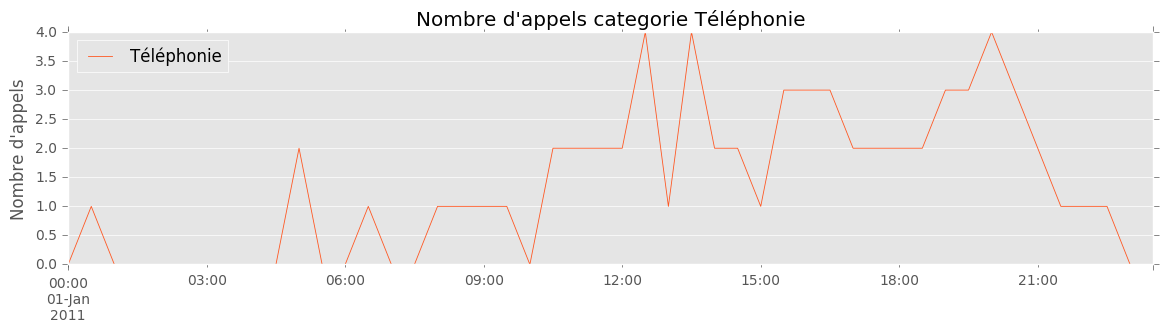

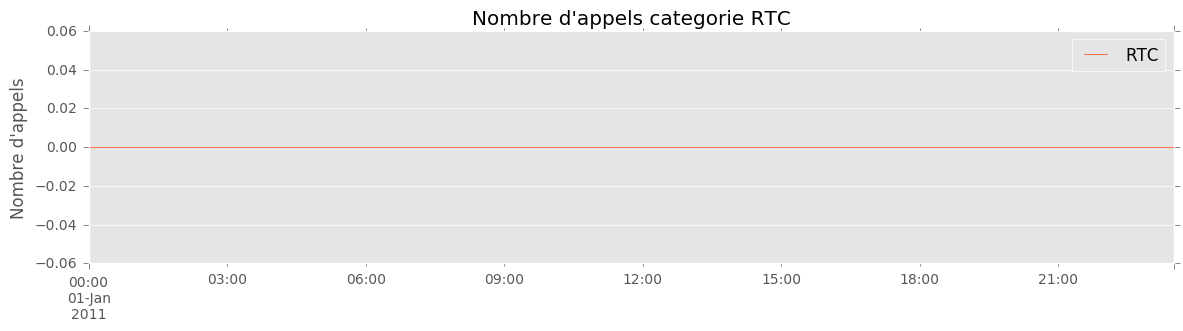

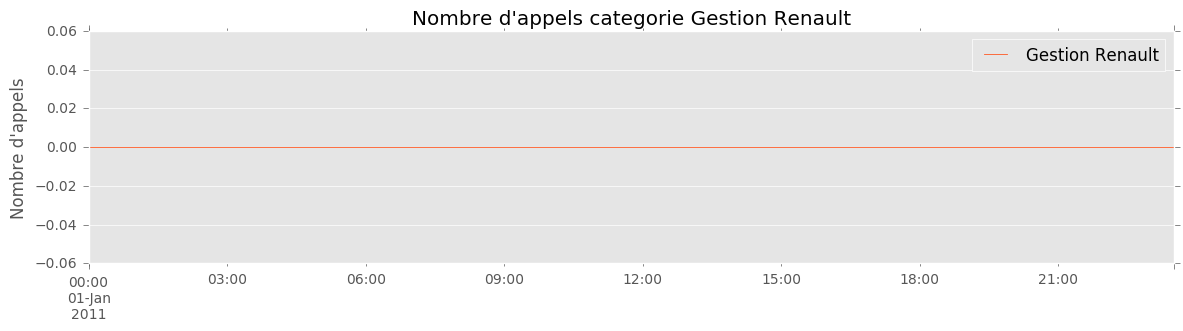

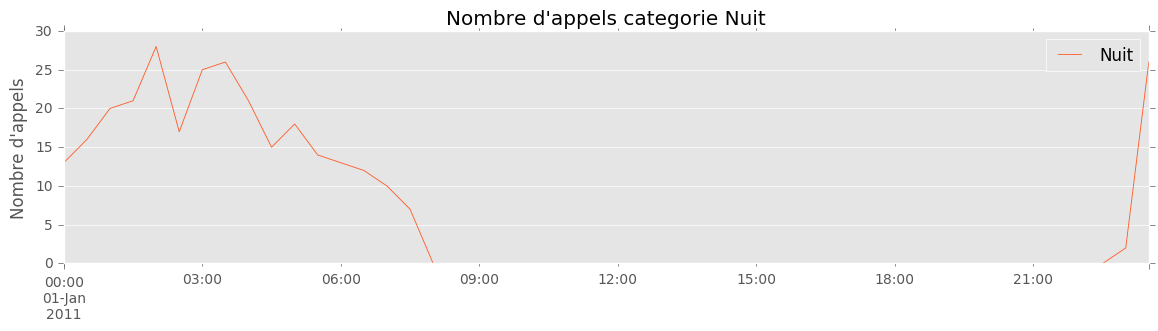

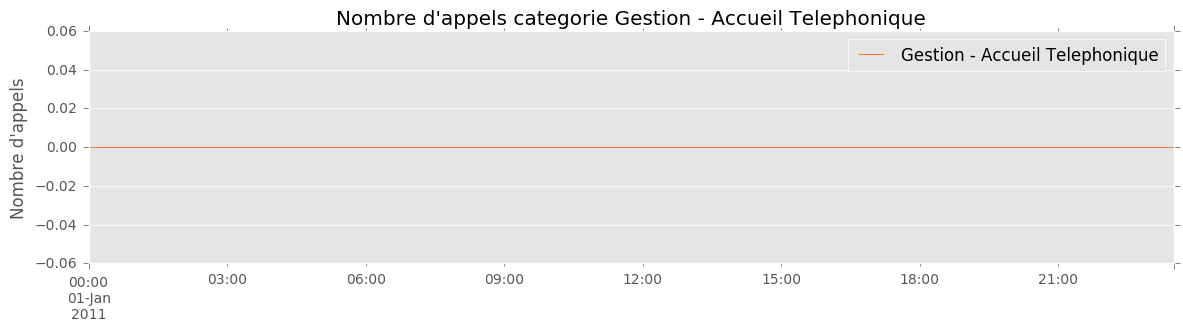

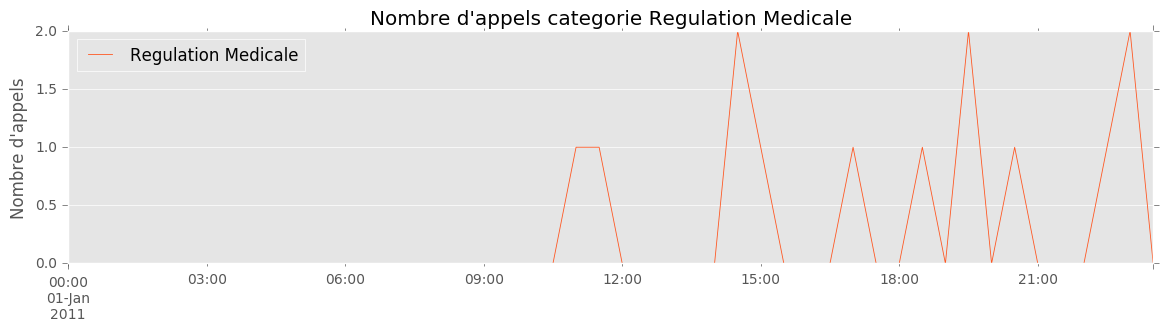

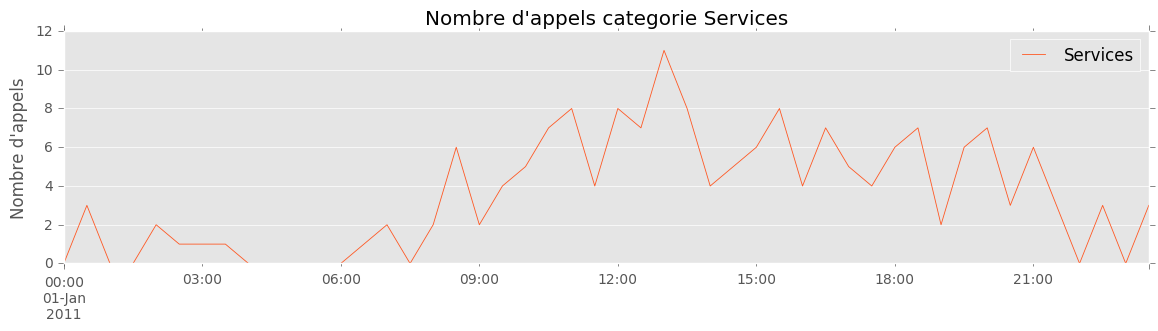

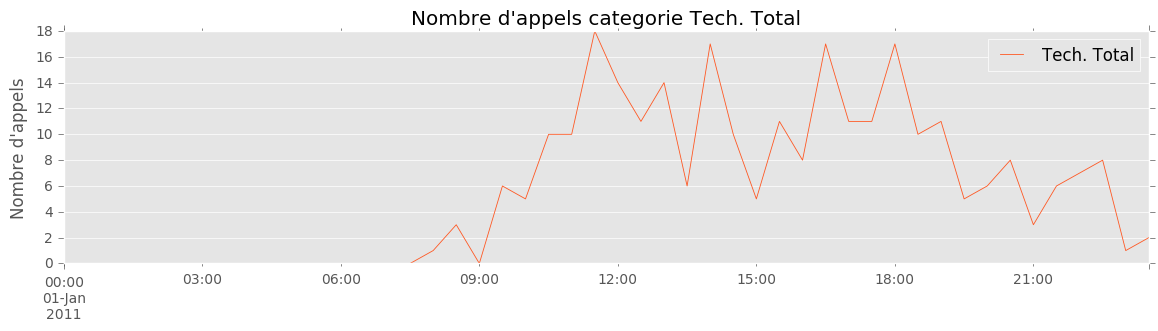

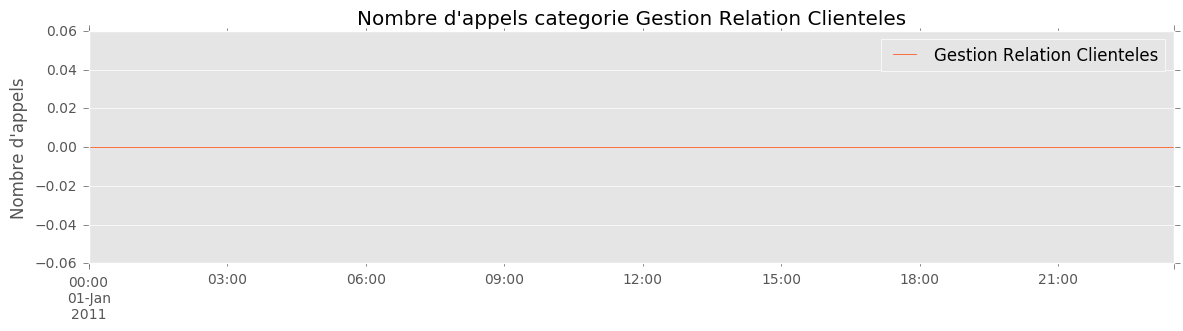

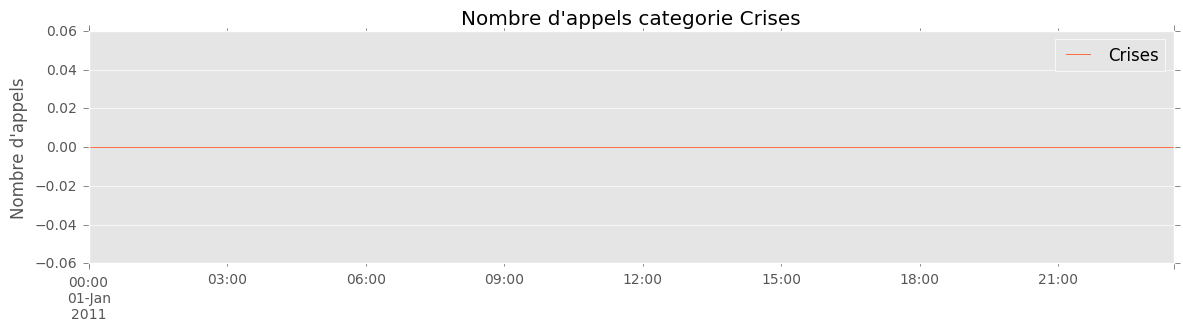

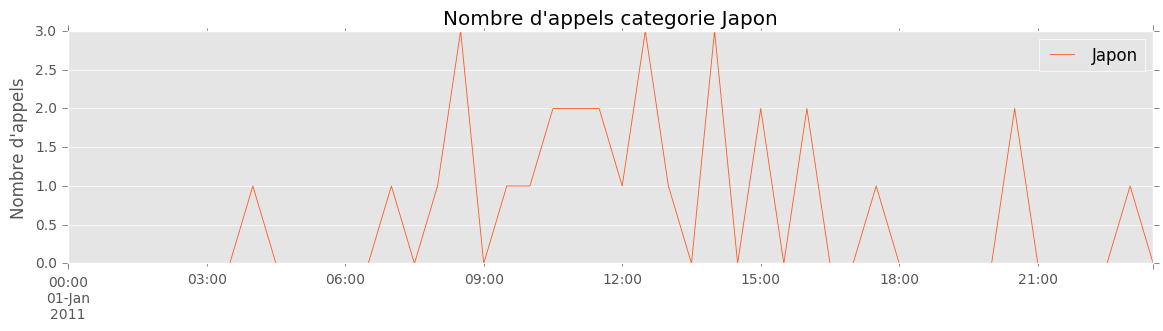

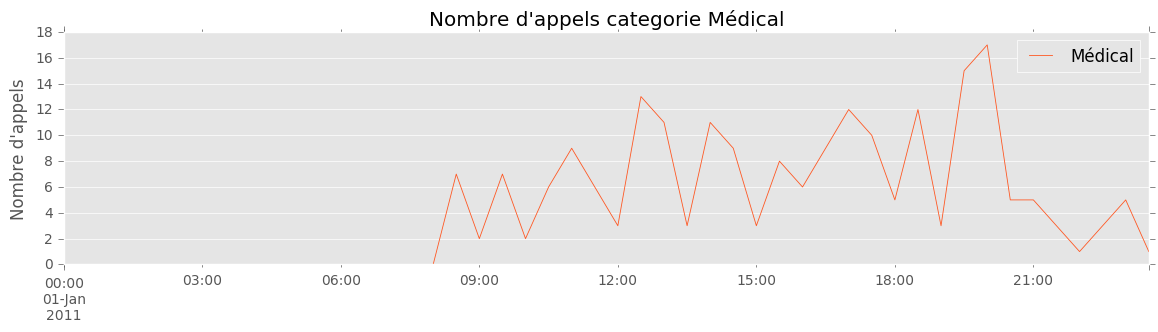

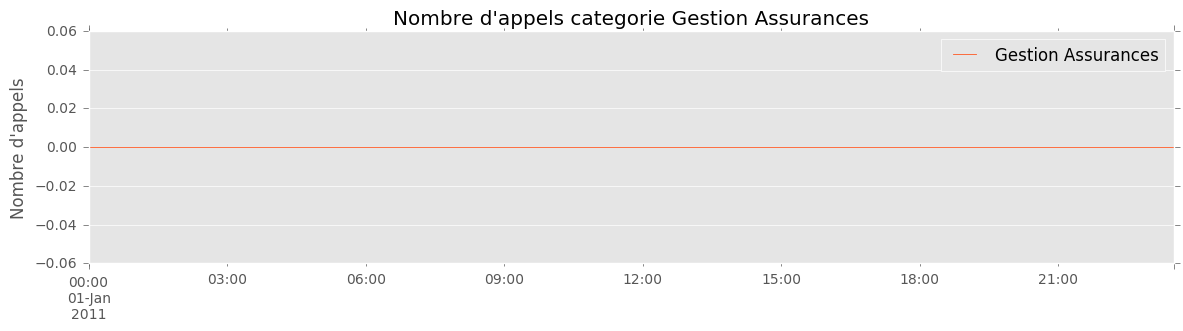

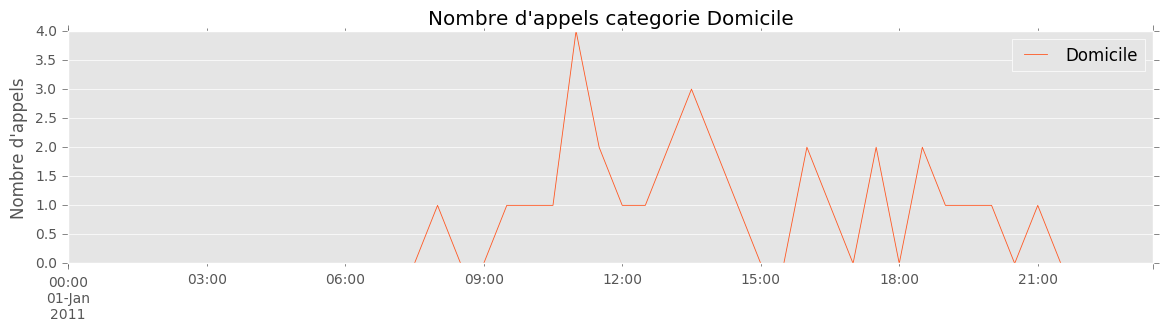

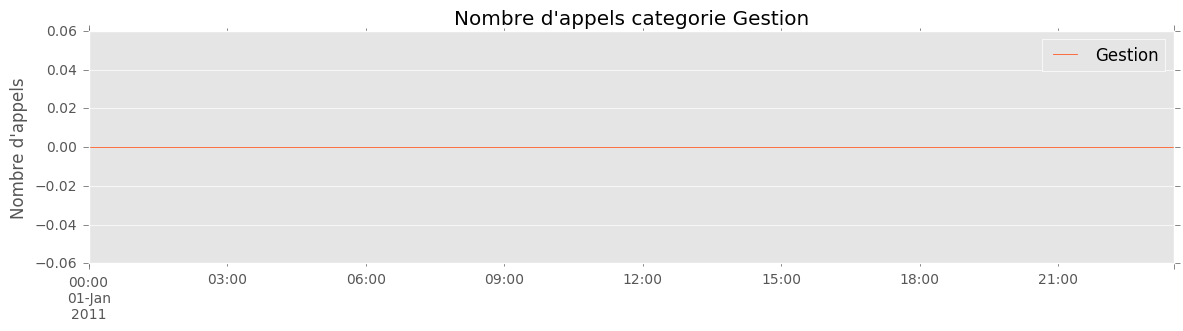

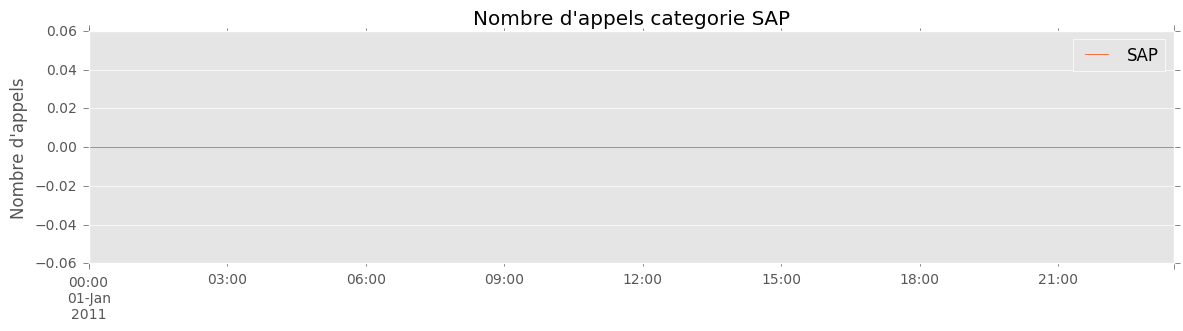

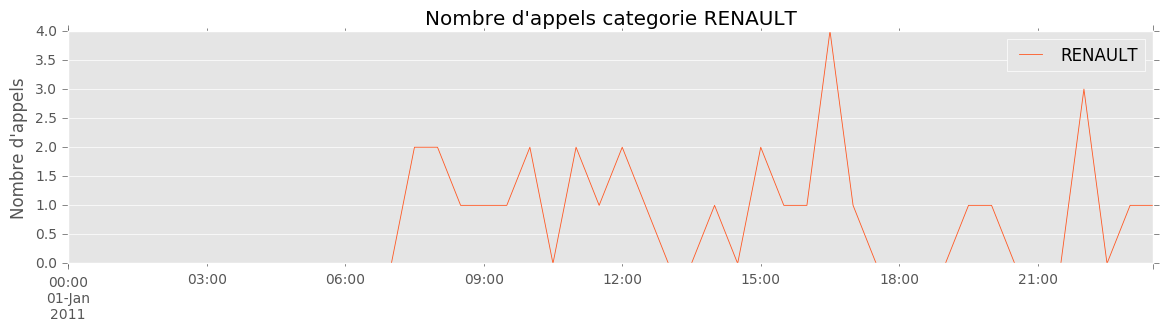

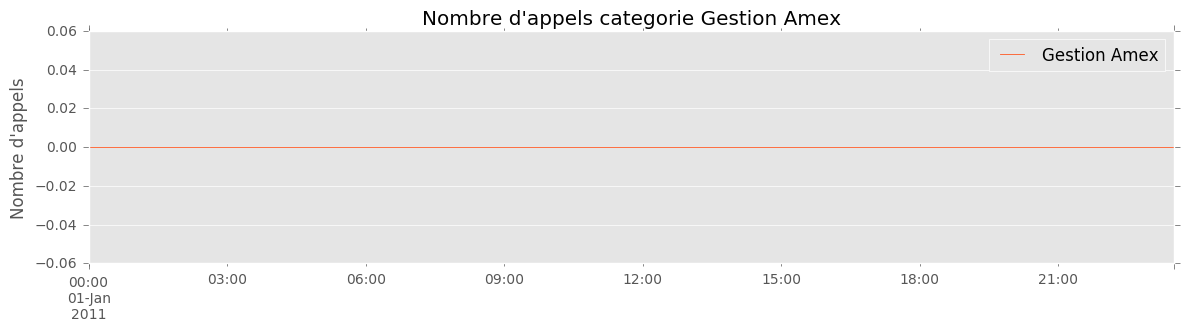

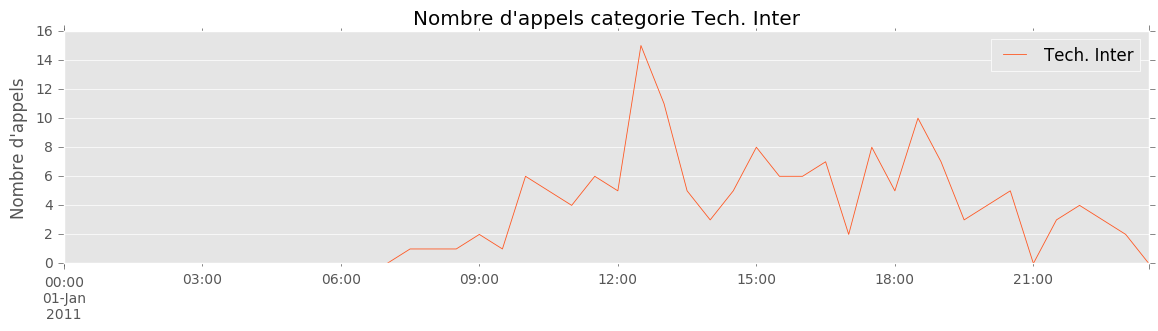

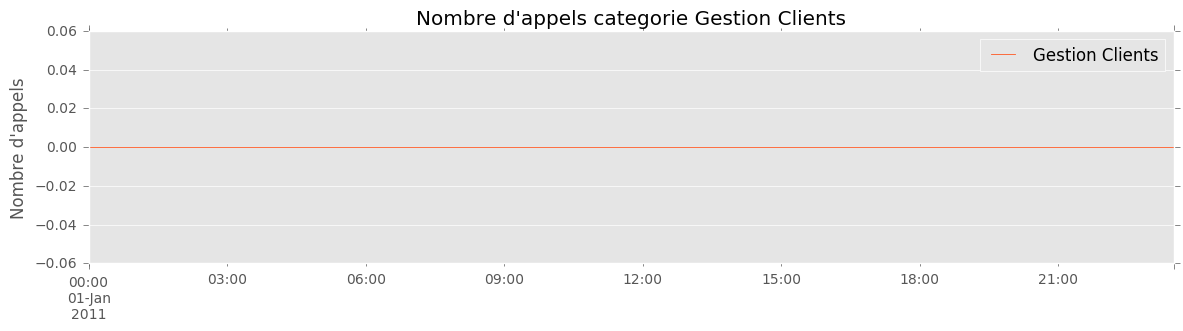

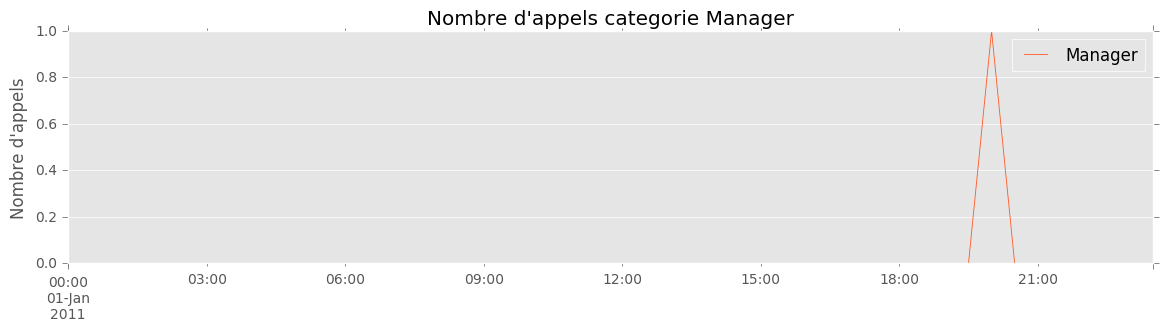

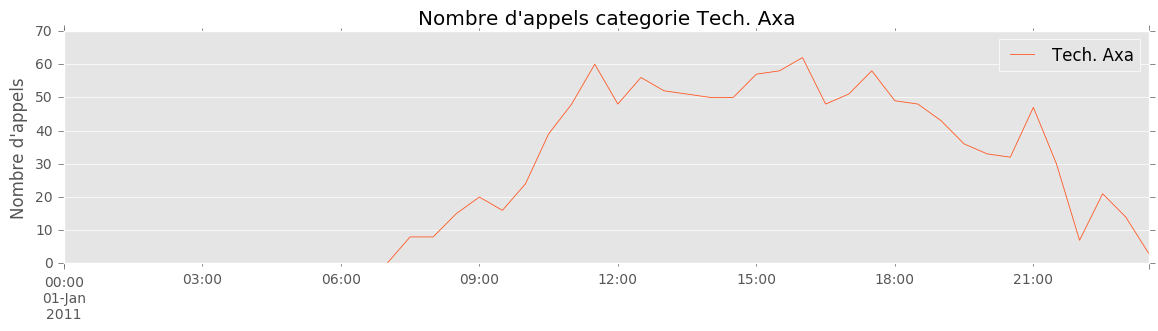

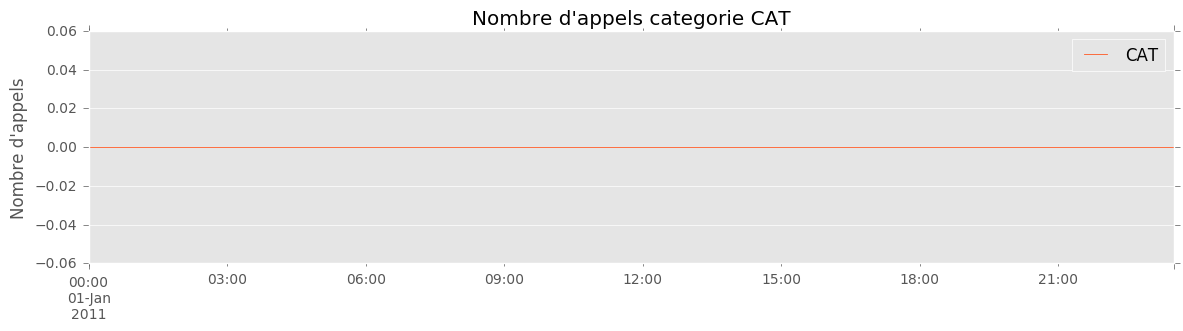

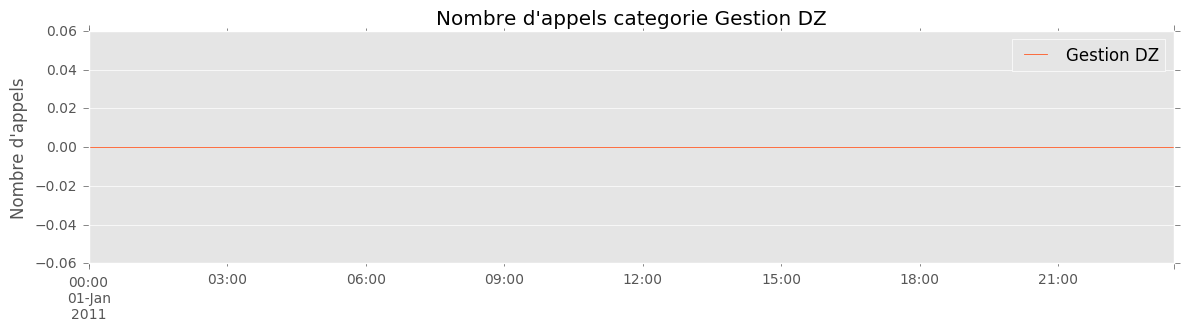

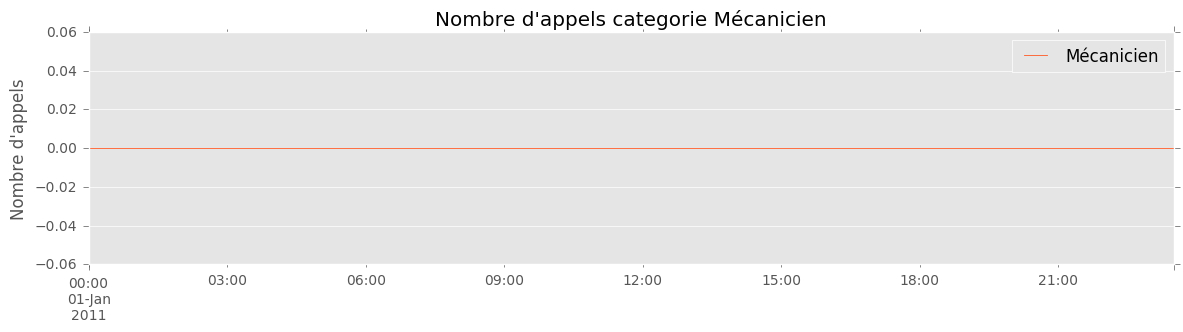

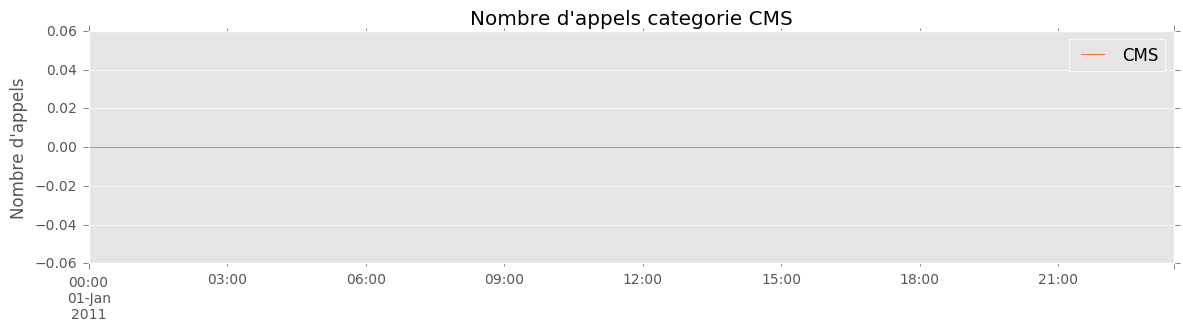

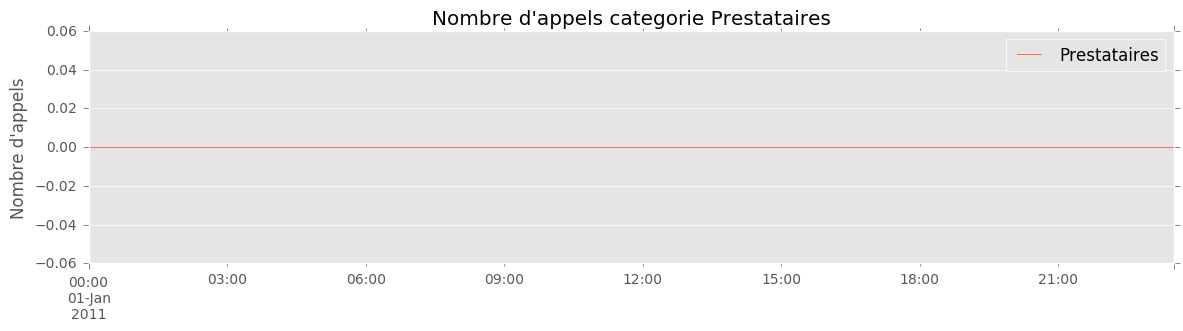

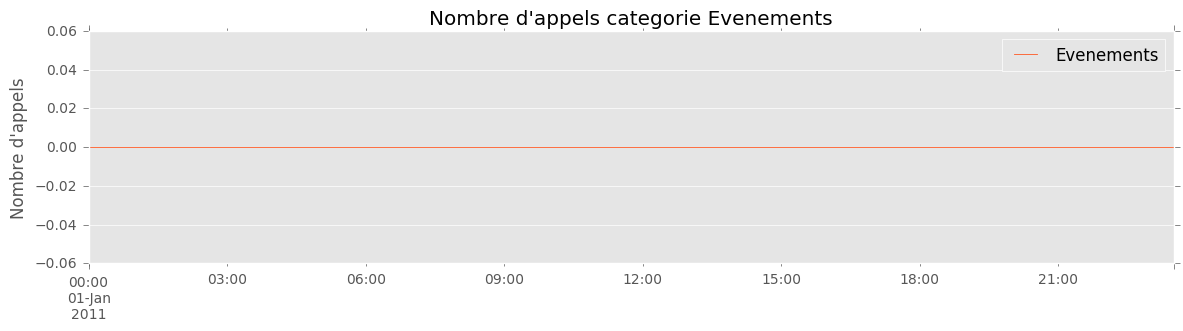

In [218]:
for cat in data.ASS_ASSIGNMENT.unique() :
    fig = plt.figure(figsize=[14,3])
    plt.style.use('ggplot')
    period = '2011-01-01'
    plot_cat = df1['CSPL_CALLS'][cat][period].plot(color=orange_med,linewidth=.6)
    #plot_registered = X['CSPL_ACDCALLS'][periode].plot(color=blue_light,linewidth=.6)
    #plot_casual = X['CSPL_ABNCALLS'][periode].plot(color=green_light,linewidth=.6)
    plt.ylabel('Nombre d\'appels')
    plt.legend([cat.decode('utf-8')],loc='best')
    plt.title('Nombre d\'appels categorie %s' %cat.decode('utf-8'))
    plt.xlabel('')
    plt.show()
    fig.savefig('plots/appels_categorie_%s_period.png' %(cat.decode('utf-8'),period),bbox_inches='tight')

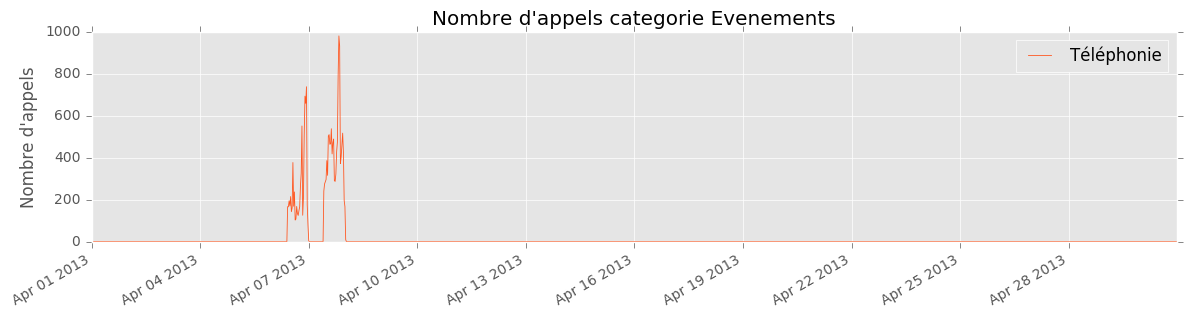

In [13]:
fig = plt.figure(figsize=[14,3])
plt.style.use('ggplot')
plot_cat = df1['CSPL_CALLS']['Evenements']['2013-04'].plot(color=orange_med,linewidth=.6)
#plot_registered = X['CSPL_ACDCALLS'][periode].plot(color=blue_light,linewidth=.6)
#plot_casual = X['CSPL_ABNCALLS'][periode].plot(color=green_light,linewidth=.6)
plt.ylabel('Nombre d\'appels')
plt.legend([cat.decode('utf-8')],loc='best')
plt.title('Nombre d\'appels categorie %s' %'Evenements')
plt.xlabel('')
plt.show()
#fig.savefig('plots/appels_categorie_%s_period.png' %(cat.decode('utf-8'),period),bbox_inches='tight')

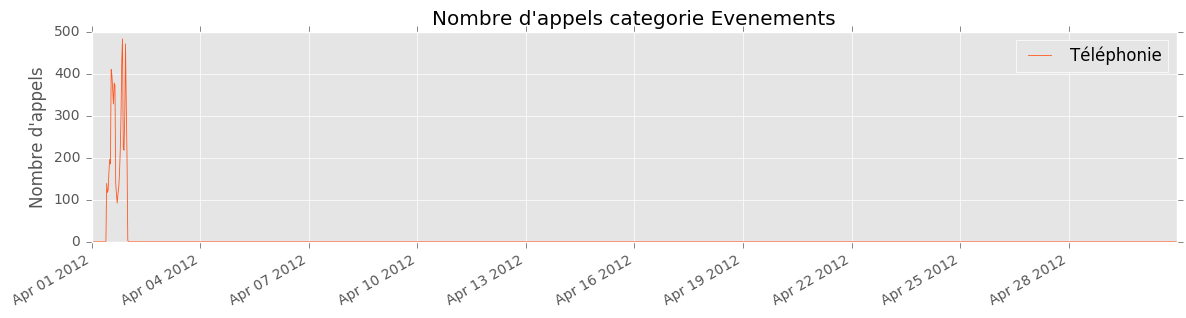

In [15]:
fig = plt.figure(figsize=[14,3])
plt.style.use('ggplot')
plot_cat = df1['CSPL_CALLS']['Evenements']['2012-04'].plot(color=orange_med,linewidth=.6)
#plot_registered = X['CSPL_ACDCALLS'][periode].plot(color=blue_light,linewidth=.6)
#plot_casual = X['CSPL_ABNCALLS'][periode].plot(color=green_light,linewidth=.6)
plt.ylabel('Nombre d\'appels')
plt.legend([cat.decode('utf-8')],loc='best')
plt.title('Nombre d\'appels categorie %s' %'Evenements')
plt.xlabel('')
plt.show()
#fig.savefig('plots/appels_categorie_%s_period.png' %(cat.decode('utf-8'),period),bbox_inches='tight')

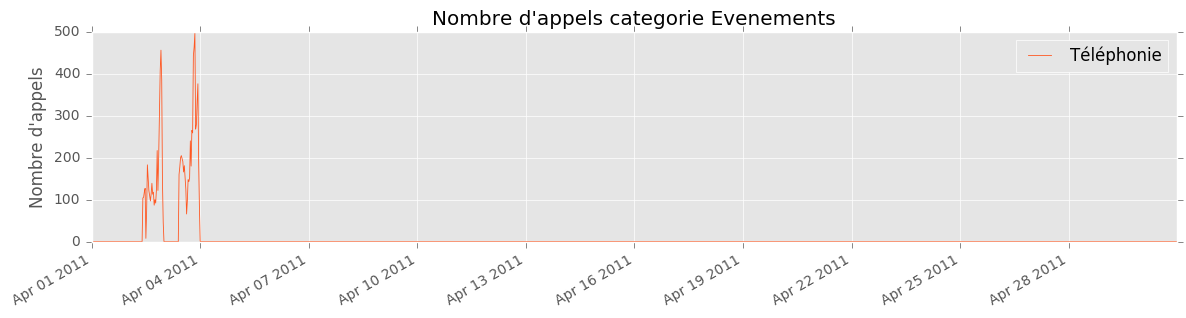

In [16]:
fig = plt.figure(figsize=[14,3])
plt.style.use('ggplot')
plot_cat = df1['CSPL_CALLS']['Evenements']['2011-04'].plot(color=orange_med,linewidth=.6)
#plot_registered = X['CSPL_ACDCALLS'][periode].plot(color=blue_light,linewidth=.6)
#plot_casual = X['CSPL_ABNCALLS'][periode].plot(color=green_light,linewidth=.6)
plt.ylabel('Nombre d\'appels')
plt.legend([cat.decode('utf-8')],loc='best')
plt.title('Nombre d\'appels categorie %s' %'Evenements')
plt.xlabel('')
plt.show()
#fig.savefig('plots/appels_categorie_%s_period.png' %(cat.decode('utf-8'),period),bbox_inches='tight')

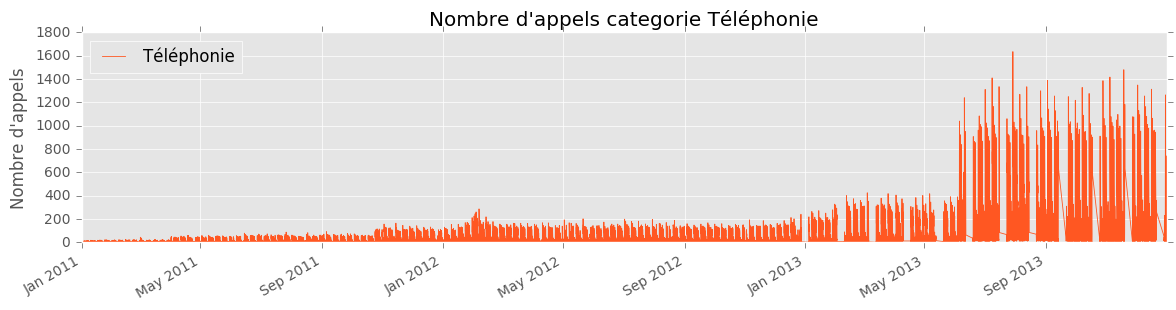

In [245]:
fig = plt.figure(figsize=[14,3])
plt.style.use('ggplot')
cat = 'Téléphonie'
plot_cat = df1['CSPL_CALLS'][cat].plot(color=orange_med,linewidth=.6)
#plot_registered = X['CSPL_ACDCALLS'][periode].plot(color=blue_light,linewidth=.6)
#plot_casual = X['CSPL_ABNCALLS'][periode].plot(color=green_light,linewidth=.6)
plt.ylabel('Nombre d\'appels')
plt.legend([cat.decode('utf-8')],loc='best')
plt.title('Nombre d\'appels categorie %s' %cat.decode('utf-8'))
plt.xlabel('')
plt.show()
#fig.savefig('plots/appels_categorie_%s_period.png' %(cat.decode('utf-8'),period),bbox_inches='tight')

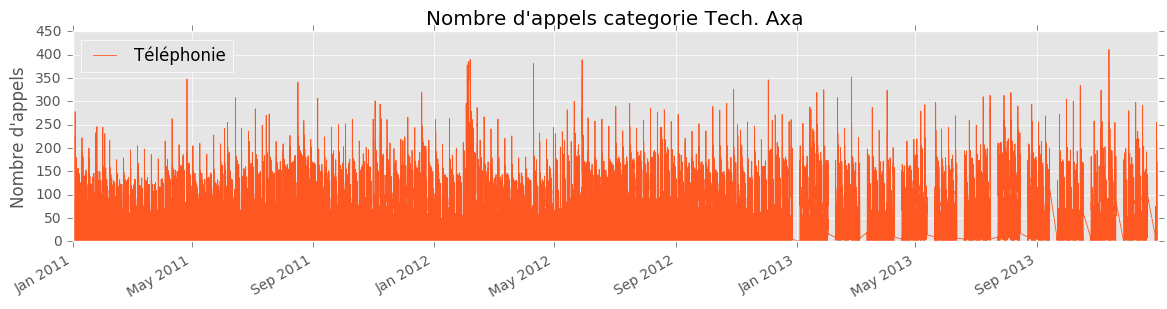

In [246]:
fig = plt.figure(figsize=[14,3])
plt.style.use('ggplot')
plot_cat = df1['CSPL_CALLS']['Tech. Axa'].plot(color=orange_med,linewidth=.6)
#plot_registered = X['CSPL_ACDCALLS'][periode].plot(color=blue_light,linewidth=.6)
#plot_casual = X['CSPL_ABNCALLS'][periode].plot(color=green_light,linewidth=.6)
plt.ylabel('Nombre d\'appels')
plt.legend([cat.decode('utf-8')],loc='best')
plt.title('Nombre d\'appels categorie %s' %'Tech. Axa')
plt.xlabel('')
plt.show()
#fig.savefig('plots/appels_categorie_%s_period.png' %(cat.decode('utf-8'),period),bbox_inches='tight')

In [238]:
df1 = X.pivot_table(index = ['DATE'], columns = ['ASS_ASSIGNMENT'], values = ['CSPL_CALLS'], aggfunc=np.sum)
print(df1.shape)
df1.fillna(0, inplace=True)
#df1.head()

y_df = pd.DataFrame()
#X_df['year','month','day','hour','min'] = X_df.index
#X_df = splitDatetime(X_df)
for cat in data.ASS_ASSIGNMENT.unique() :
    y_df[cat] = df1['CSPL_CALLS'][cat]
#X_df.drop('DATE', axis=1, inplace=True)
y_df.head()

(46653, 28)


Téléphonie  RTC  Gestion Renault  Nuit  \
DATE                                                          
2011-01-01 00:00:00         0.0  0.0              0.0  13.0   
2011-01-01 00:30:00         1.0  0.0              0.0  16.0   
2011-01-01 01:00:00         0.0  0.0              0.0  20.0   
2011-01-01 01:30:00         0.0  0.0              0.0  21.0   
2011-01-01 02:00:00         0.0  0.0              0.0  28.0   

                     Gestion - Accueil Telephonique  Regulation Medicale  \
DATE                                                                       
2011-01-01 00:00:00                             0.0                  0.0   
2011-01-01 00:30:00                             0.0                  0.0   
2011-01-01 01:00:00                             0.0                  0.0   
2011-01-01 01:30:00                             0.0                  0.0   
2011-01-01 02:00:00                             0.0                  0.0   

                     Services  Tech. Total  Gestion Relation Clienteles  \
DATE                                                                      
2011-01-01 00:00:00       0.0          0.0                          0.0   
2011-01-01 00:30:00       3.0          0.0                          0.0   
2011-01-01 01:00:00       0.0          0.0                          0.0   
2011-01-01 01:30:00       0.0          0.0                          0.0   
2011-01-01 02:00:00       2.0          0.0                          0.0   

                     Crises     ...      Tech. Inter  Gestion Clients  \
DATE                            ...                                     
2011-01-01 00:00:00     0.0     ...              0.0              0.0   
2011-01-01 00:30:00     0.0     ...              0.0              0.0   
2011-01-01 01:00:00     0.0     ...              0.0              0.0   
2011-01-01 01:30:00     0.0     ...              0.0              0.0   
2011-01-01 02:00:00     0.0     ...              0.0              0.0   

                     Manager  Tech. Axa  CAT  Gestion DZ  Mécanicien  CMS  \
DATE                                                                        
2011-01-01 00:00:00      0.0        0.0  0.0         0.0         0.0  0.0   
2011-01-01 00:30:00      0.0        0.0  0.0         0.0         0.0  0.0   
2011-01-01 01:00:00      0.0        0.0  0.0         0.0         0.0  0.0   
2011-01-01 01:30:00      0.0        0.0  0.0         0.0         0.0  0.0   
2011-01-01 02:00:00      0.0        0.0  0.0         0.0         0.0  0.0   

                     Prestataires  Evenements  
DATE                                           
2011-01-01 00:00:00           0.0         0.0  
2011-01-01 00:30:00           0.0         0.0  
2011-01-01 01:00:00           0.0         0.0  
2011-01-01 01:30:00           0.0         0.0  
2011-01-01 02:00:00           0.0         0.0  

[5 rows x 28 columns]

In [255]:
X_df = pd.DataFrame(index = y_df.index)
X_df['DATE'] = y_df.index
X_df = splitDatetime(X_df)
X_df.drop('DATE', axis=1, inplace=True)
X_df.head()

year  month  day  hour  min  workingday
DATE                                                        
2011-01-17 00:00:00  2011      1   17     0    0           1
2011-01-17 00:30:00  2011      1   17     0   30           1
2011-01-17 01:00:00  2011      1   17     1    0           1
2011-01-17 01:30:00  2011      1   17     1   30           1
2011-01-17 02:00:00  2011      1   17     2    0           1

### Regressor

In [265]:
# Add historic usage to each X vector
# Set number of hours prediction is in advance
n_periods_advance = 336

# Set number of historic hours used
n_periods_window = 178

# Set number of historic hours in advance
extra = ['Téléphonie']
for cat in extra:#data.ASS_ASSIGNMENT.unique():
    for k in range(n_periods_advance,n_periods_advance+n_periods_window):    
        X_df['%s_t-%i'%(cat.decode('utf-8'),k)] = y_df[cat].shift(k)

X_df.drop(X_df.index[:n_periods_window+n_periods_advance], inplace=True)
y_df.drop(y_df.index[:n_periods_window+n_periods_advance], inplace=True)

print(X_df.head())

                     year  month  day  hour  min  workingday  \
DATE                                                           
2011-02-03 20:00:00  2011      2    3    20    0           1   
2011-02-03 20:30:00  2011      2    3    20   30           1   
2011-02-03 21:00:00  2011      2    3    21    0           1   
2011-02-03 21:30:00  2011      2    3    21   30           1   
2011-02-03 22:00:00  2011      2    3    22    0           1   

                     Téléphonie_t-336  Téléphonie_t-337  Téléphonie_t-338  \
DATE                                                                        
2011-02-03 20:00:00               3.0               4.0               3.0   
2011-02-03 20:30:00               3.0               3.0               4.0   
2011-02-03 21:00:00               4.0               3.0               3.0   
2011-02-03 21:30:00               1.0               4.0               3.0   
2011-02-03 22:00:00               2.0               1.0               4.0   

           

In [258]:
print(X_df.head())
print(X_df.shape)
print(y_df.head())
print(y_df.shape)

                     year  month  day  hour  min  workingday  \
DATE                                                           
2011-01-24 03:00:00  2011      1   24     3    0           1   
2011-01-24 03:30:00  2011      1   24     3   30           1   
2011-01-24 04:00:00  2011      1   24     4    0           1   
2011-01-24 04:30:00  2011      1   24     4   30           1   
2011-01-24 05:00:00  2011      1   24     5    0           1   

                     Téléphonie_t-336  Téléphonie_t-337  Téléphonie_t-338  \
DATE                                                                        
2011-01-24 03:00:00               1.0               1.0               0.0   
2011-01-24 03:30:00               1.0               1.0               1.0   
2011-01-24 04:00:00               1.0               1.0               1.0   
2011-01-24 04:30:00               0.0               1.0               1.0   
2011-01-24 05:00:00               3.0               0.0               1.0   

           

### Feature extractor for regression

In [240]:
import numpy as np
import pandas as pd
from sklearn import preprocessing as pre

class FeatureExtractor(object):
    def __init__(self):
        pass

    def fit(self, X_df, y_df):
        pass
    
    def transform(self, X_df):
        return X_df

### Regressor

In [277]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
import xgboost as xgb
from sklearn.svm import SVC, SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

#from xgboost import plot_importance


class Regressor(BaseEstimator):
    def __init__(self):
        self.n_components = 20
        self.reg = Pipeline([
            ('pca', PCA(n_components = self.n_components)),
            ('xgb', xgb.XGBRegressor(
                learning_rate = 0.1,
                n_estimators = 100,
                max_depth = 2,
                min_child_weight = 1,
                gamma = 0.2,
                subsample = 0.9,
            ))
            # ('svr', SVR(kernel='rbf',C=10000,gamma=.001))
        ])

    def fit(self, X, y):
        #y = y.astype(float) 
        self.reg.fit(X, y)
        #plot_importance(self.reg)
        #pyplot.show()
        #self.reg.score(X,y)


    def predict(self, X):
        return self.reg.predict(X)
        #feat_imp = pd.Series(self.reg.booster().get_fscore()).sort_values(ascending=False)
        #feat_imp.plot(kind='bar', title='Feature Importances')
        #plt.ylabel('Feature Importance Score')
        #plt.show()
    def feature_importances(self):
        def get_xgb_imp(xgb, feat_names):
            from numpy import array
            imp_vals = xgb.booster().get_fscore()
            imp_dict = {feat_names[i]:float(imp_vals.get('f'+str(i),0.)) for i in range(len(feat_names))}
            total = array(imp_dict.values()).sum()
            return {k:v/total for k,v in imp_dict.items()}
        return get_xgb_imp(self.reg.named_steps['xgb'],feat_names)

    def predict_proba(self, X):
        return self.reg.predict_proba(X)
    
    def grid_search_fit(self, X, y):
        y = y.astype(float)
        # use a full grid over all parameters
        param_grid = dict(
            #pca__n_components = [10,20,40],
            xgb__max_depth = [3,10,2],#[10,11,9]#[9,10,11],#
            xgb__min_child_weight = [1,6,2],
            #xgb__gamma = [i/10.0 for i in range(0,5)]
            #xgb__subsample = [i/10.0 for i in range(6,10)],
            #xgb__colsample_bytree = [i/10.0 for i in range(6,10)]
            #svr__C = [.01,1.0,10.0,100.0,1000.0],
            #svr__gamma = [.01,.001,.0001]
            )

        param_grid_rfr = dict(
            max_leaf_nodes = [9,10,11],
            max_depth = [3, None],
            max_features = [1, 3, 10],
            min_samples_split = [3, 10],
            min_samples_leaf = [1, 3, 10],
            bootstrap = [True, False]
            )

        # error definition
        linex = make_scorer(ef.linex_loss, greater_is_better = False)

        grid_search = GridSearchCV(self.reg, param_grid = param_grid, scoring = linex)#, verbose = 10)

        # fit gridsearch
        self.reg = grid_search.fit(X, y)

        print('Grid search  best score: %.3f' % grid_search.best_score_)
        print('Grid search  best params:')
        for k, v in sorted(grid_search.best_params_.items()):
            print("\t%s: %r" % (k, v))
        # get best estimator
        self.reg = grid_search.best_estimator_


### Cross validation Module

In [276]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

def train_test_model_clf(X_df, y_df, skf_is, FeatureExtractor, Classifier):
    
    y_train_reg = {}
    y_test_reg = {}
    reg = {}
    y_pred_reg = {}
    error = 0
    
    for cat in data.ASS_ASSIGNMENT.unique():
        print('%s' %cat.decode('utf-8'))
        if cat not in ['Evenements','Gestion Amex']:
            print('------------------------------------------------')
            # Spliting data for cross validation
            train_is, test_is = skf_is

            # test/train definition
            X_train_df = X_df.iloc[train_is].copy()
            y_train_df = y_df.iloc[train_is].copy()
            X_test_df = X_df.iloc[test_is].copy()
            y_test_df = y_df.iloc[test_is].copy()

            # casual/registered definition
            y_train_reg[cat] = y_train_df[cat].values
            y_test_reg[cat] = y_test_df[cat].values
            # y_test_reg = y_test_df['count'].values
            print("Done.")

            # Features extraction (no modification of data in this case)
            print("Exctracting features ..."),
            fe_reg = FeatureExtractor()
            fe_reg.fit(X_train_df, y_train_df)
            X_train_array_reg = fe_reg.transform(X_train_df)
            X_test_array_reg = fe_reg.transform(X_test_df)
            print("Done.")

            # Train
            print("Training algorithm for %s..." %cat.decode('utf-8')),
            # regressors initialisation
            reg[cat] = Regressor()

            # uncomment to perform grid search to calibrate model before fitting
            #if cat in ['Tech. Axa','Téléphonie','CAT']:
            #    reg[cat].grid_search_fit(X_train_array_reg, y_train_reg[cat])

            # fitting model
            reg[cat].fit(X_train_array_reg, y_train_reg[cat])
            print("Done.")

            # Test
            print("Testing algorithm for %s..." %cat.decode('utf-8')),
            y_pred_reg[cat] = np.round(reg[cat].predict(X_test_array_reg),0)
            error_tmp = ef.linex_loss(y_pred_reg[cat], y_test_reg[cat])
            error += error_tmp

            print("Done.")
            print('error %s = %.0f' %(cat.decode('utf-8'),error_tmp))
            print('\n------------------------------------------------')
        else:
            # y_pred_reg[cat] = np.zeros(X_test_array_reg.shape[0])
             # test/train definition
            #y_test_df = y_df.iloc[test_is].copy()
            #y_test_reg[cat] = y_test_df[cat].values
            #error_tmp = ef.linex_loss(y_pred_reg[cat], y_test_reg[cat])
            #error += error_tmp
            print("pass.")
            print('------------------------------------------------')
    k = X_train_df.shape[0]+X_test_df.shape[0]
    l = X_train_df.shape[0]
    print('train sample size %% total sample size = %.2f%%' %(100*float(l)/k))
    print('error = %.0f' %(error))
    
skf = ShuffleSplit(n_splits=2)
skf_is = list(skf.split(X_df))[0]
#a = X_df.shape[0]
#print(skf_is)

#prop = 0.9
#skf_is = ([np.arange(a*prop).astype(int),np.arange(a*prop,a).astype(int)])


#print(skf_is)

train_test_model_clf(X_df, y_df, skf_is, FeatureExtractor, Regressor)

Téléphonie
------------------------------------------------
Done.
Exctracting features ... Done.
Training algorithm for Téléphonie...

KeyboardInterrupt: 

In [263]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

def train_test_model_clf(X_train, X_test, y_train, FeatureExtractor):
    
    y_train_reg = {}
    y_test_reg = {}
    reg = {}
    y_pred_reg = {}
    error = 0
    first = True
    y_pred = np.zeros((submission.shape[0]))
    
    for cat in submission.ASS_ASSIGNMENT.unique():
        print('%s' %cat.decode('utf-8'))
        if cat not in ['Evenements','Gestion Amex']:
            print('------------------------------------------------')

            # test/train definition
            X_train_df = X_train.copy()
            y_train_df = y_train.copy()
            X_test_df = X_test.copy()

            # cat definition
            y_train_reg[cat] = y_train_df[cat].values
            print("Done.")

            # Features extraction (no modification of data in this case)
            print("Exctracting features ..."),
            fe_reg = FeatureExtractor()
            fe_reg.fit(X_train_df, y_train_df)
            X_train_array_reg = fe_reg.transform(X_train_df)
            X_test_array_reg = fe_reg.transform(X_test_df)
            print("Done.")

            # Train
            print("Training algorithm for %s..." %cat.decode('utf-8')),
            # regressors initialisation
            reg[cat] = Regressor()

            # uncomment to perform grid search to calibrate model before fitting
            #if cat in ['Tech. Axa','Téléphonie','CAT']:
            #    reg[cat].grid_search_fit(X_train_array_reg, y_train_reg[cat])

            # fitting model
            reg[cat].fit(X_train_array_reg, y_train_reg[cat])
            print("Done.")

            # Test
            #print("Testing algorithm for %s..." %cat.decode('utf-8')),
            #y_pred_reg[cat] = np.round(reg[cat].predict(X_test_array_reg),0)
            #print(y_pred_reg[cat][1:10])
            
            print("Done.")
            print('\n------------------------------------------------')
        else:
            # y_pred_reg[cat] = np.zeros(X_test_array_reg.shape[0])
             # test/train definition
            #y_test_df = y_df.iloc[test_is].copy()
            #y_test_reg[cat] = y_test_df[cat].values
            #error_tmp = ef.linex_loss(y_pred_reg[cat], y_test_reg[cat])
            #error += error_tmp
            print("pass.")
            print('------------------------------------------------')
        #if (first == True):
        #    y_pred = reg[cat].predict(X_test).astype(int)
        #    first = False
        #else:
        #    y_pred_reg[cat] = reg[cat].predict(X_test).astype(int)
        #    print(y_pred[:,None].shape,y_pred_reg[cat][:,None].shape)
        #    y_pred = np.column_stack((y_pred,y_pred_reg[cat]))
    #y_pred = np.reshape(y_pred, y_pred.size, order='F')
    #print(y_pred[:,None].shape)
    #print(y_pred[1:20])
    rep = pd.DataFrame(index = submission.index)
    #print(rep.shape)
    rep['DATE'] = submission.index
    rep['ASS_ASSIGNMENT'] = submission.ASS_ASSIGNMENT
    #rep['prediction'] = y_pred
    i = 0
    
    for index, row in rep.iterrows():
        cat = row['ASS_ASSIGNMENT']
        #if(i < 40):
        #    print(rep.loc[(rep["ASS_ASSIGNMENT"] == cat) & (rep.index == index), ["prediction"]]) 
        #    print(reg[cat].predict(X_test.loc[index])[0].astype(int))
    #    rep.loc[(rep["ASS_ASSIGNMENT"] == cat) & (rep.index == index), ["prediction"]] 
        y_pred[i] = reg[cat].predict(X_test.loc[index])[0].astype(int)
        #    print(rep.loc[(rep["ASS_ASSIGNMENT"] == cat) & (rep.index == index), ["prediction"]])
        i+=1
    rep['prediction'] = np.maximum(y_pred.astype(int),0)
        
    
    print("saved in file")
    
    rep.to_csv("submission_test.txt", sep="\t", index=False)
    
train_test_model_clf(X_df, X_test, y_df, FeatureExtractor)

 CMS
------------------------------------------------
Done.
Exctracting features ... Done.
Training algorithm for CMS... Done.
Done.

------------------------------------------------
Crises
------------------------------------------------
Done.
Exctracting features ... Done.
Training algorithm for Crises... Done.
Done.

------------------------------------------------
Domicile
------------------------------------------------
Done.
Exctracting features ... Done.
Training algorithm for Domicile...

KeyboardInterrupt: 